In [1]:
library(Seurat)

Attaching SeuratObject



# Preprocess files

In [32]:
prefix_list <- c()
for(file in list.files("/data1/chenyx/NewAnnotation")){
    if (length(grep("barcodes.tsv.gz",file))>0){
        prefix_list <- c(prefix_list, gsub("_barcodes.tsv.gz",'',file))
    }
}

In [39]:
for(prefix in prefix_list){
    dir.create(paste0("/data1/chenyx/NewAnnotation//GSE145154_RAW/",prefix))
    file.rename(from = file.path(paste0("/data1/chenyx/NewAnnotation/",prefix,"_barcodes.tsv.gz")),
               to = file.path(paste0("/data1/chenyx/NewAnnotation/GSE145154_RAW/",prefix,"/barcodes.tsv.gz")))
    file.rename(from = file.path(paste0("/data1/chenyx/NewAnnotation/",prefix,"_features.tsv.gz")),
               to = file.path(paste0("/data1/chenyx/NewAnnotation/GSE145154_RAW/",prefix,"/features.tsv.gz")))
    file.rename(from = file.path(paste0("/data1/chenyx/NewAnnotation/",prefix,"_matrix.mtx.gz")),
               to = file.path(paste0("/data1/chenyx/NewAnnotation/GSE145154_RAW/",prefix,"/matrix.mtx.gz")))
}

Warning message in dir.create(paste0("/data1/chenyx/NewAnnotation//GSE145154_RAW/", :
“'/data1/chenyx/NewAnnotation//GSE145154_RAW/GSM4307516_N-1-LVN' already exists”
Warning message in dir.create(paste0("/data1/chenyx/NewAnnotation//GSE145154_RAW/", :
“'/data1/chenyx/NewAnnotation//GSE145154_RAW/GSM4307517_N-1-RVP' already exists”
Warning message in dir.create(paste0("/data1/chenyx/NewAnnotation//GSE145154_RAW/", :
“'/data1/chenyx/NewAnnotation//GSE145154_RAW/GSM4307518_N-1-RVN' already exists”
Warning message in dir.create(paste0("/data1/chenyx/NewAnnotation//GSE145154_RAW/", :
“'/data1/chenyx/NewAnnotation//GSE145154_RAW/GSM4307519_N-1-Bld' already exists”
Warning message in dir.create(paste0("/data1/chenyx/NewAnnotation//GSE145154_RAW/", :
“'/data1/chenyx/NewAnnotation//GSE145154_RAW/GSM4307520_DCM-2-LVP' already exists”
Warning message in dir.create(paste0("/data1/chenyx/NewAnnotation//GSE145154_RAW/", :
“'/data1/chenyx/NewAnnotation//GSE145154_RAW/GSM4307521_DCM-2-LVN' already ex

In [46]:
samples <- list.dirs("/data1/chenyx/NewAnnotation/GSE145154_RAW/",full.names = FALSE)[-1]

In [47]:
samples

[1] "GSM4307515_N-1-LVP"    "GSM4307516_N-1-LVN"    "GSM4307517_N-1-RVP"   
 [4] "GSM4307518_N-1-RVN"    "GSM4307519_N-1-Bld"    "GSM4307520_DCM-2-LVP" 
 [7] "GSM4307521_DCM-2-LVN"  "GSM4307522_DCM-2-RVP"  "GSM4307523_DCM-2-RVN" 
[10] "GSM4307524_DCM-2-Bld"  "GSM4307525_DCM-3-LVP"  "GSM4307526_DCM-3-LVN" 
[13] "GSM4307527_DCM-3-RVP"  "GSM4307528_DCM-3-RVN"  "GSM4307529_DCM-3-Bld" 
[16] "GSM4307530_ICM-1-MIP"  "GSM4307531_ICM-1-MIN"  "GSM4307532_ICM-1-NMIP"
[19] "GSM4307533_ICM-1-NMIN" "GSM4307534_ICM-1-Bld"  "GSM4307535_ICM-2-LVP" 
[22] "GSM4307536_ICM-2-LVN"  "GSM4307537_ICM-2-RVP"  "GSM4307538_ICM-2-RVN" 
[25] "GSM4307539_ICM-2-Bld"  "GSM4307540_ICM-3-LVP"  "GSM4307541_ICM-3-LVN" 
[28] "GSM4307542_ICM-3-RVP"  "GSM4307543_ICM-3-RVN"  "GSM4307544_ICM-3-Bld" 
[31] "GSM4307545_RM-36"      "GSM4307546_RM-37"      "GSM4307549_RM-40"     
[34] "GSM4307550_RM-42"      "GSM4307551_RM-44"      "GSM4307552_RM-46"

In [53]:
object_list <- list()

In [118]:
for(sample in samples){
    matrix <- Read10X(paste0("/data1/chenyx/NewAnnotation/GSE145154_RAW/",sample))
    colnames(matrix) <- paste0(strsplit(sample,'_')[[1]][1],'_',colnames(matrix))
    dataobj <- CreateSeuratObject(counts = matrix)
    dataobj$Sample <- sample
    dataobj$Sample_status <- strsplit(strsplit(sample,'_')[[1]][2],'-')[[1]][1]
    dataobj$location <- strsplit(strsplit(sample,'_')[[1]][2],'-')[[1]][3]
    object_list[sample] <- dataobj
}

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message in `[<-`(`*tmp*`, sample, value = dataobj):
“implicit list embedding of S4 objects is deprecated”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message in `[<-`(`*tmp*`, sample, value = dataobj):
“implicit list embedding of S4 objects is deprecated”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message in `[<-`(`*tmp*`, sample, value = dataobj):
“implicit list embedding of S4 objects is deprecated”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message in `[<-`(`*tmp*`, sample, value = dataobj):
“implicit list embedding of S4 objects is deprecated”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message in `[<-`(`*tmp*`, sample, value = dataobj):
“implicit list embedding

In [120]:
obj.merged <- merge(object_list[[1]],object_list[[2]] )
for(sample in samples[-c(1,2)]){
    obj.merged <- merge(obj.merged, object_list[[sample]])
}

In [121]:
obj.merged$location[obj.merged$Sample_status=="RM"] <- "LV"
obj.merged$organ = "Heart"
obj.merged$organ[obj.merged$location=="Bld"] <- "Blood"
obj.merged[[]]

orig.ident nCount_RNA nFeature_RNA
GSM4307515_AAACCTGAGACGCACA-1 GSM4307515   854       379        
GSM4307515_AAACCTGAGACTAGGC-1 GSM4307515  1287       659        
GSM4307515_AAACCTGAGTAGTGCG-1 GSM4307515  1285       642        
GSM4307515_AAACCTGAGTGTTGAA-1 GSM4307515  2397      1036        
GSM4307515_AAACCTGCAGTATAAG-1 GSM4307515  3248      1035        
GSM4307515_AAACCTGGTACAGACG-1 GSM4307515   902       411        
GSM4307515_AAACCTGGTGATGCCC-1 GSM4307515   511       332        
GSM4307515_AAACCTGTCGATCCCT-1 GSM4307515  1773       821        
GSM4307515_AAACCTGTCGGCGCAT-1 GSM4307515  3406      1290        
GSM4307515_AAACCTGTCTTCGGTC-1 GSM4307515  4642      1646        
GSM4307515_AAACGGGAGGCACATG-1 GSM4307515  2101       782        
GSM4307515_AAACGGGCAAGCGATG-1 GSM4307515  5465      1833        
GSM4307515_AAACGGGCAAGGTTCT-1 GSM4307515  2144       943        
GSM4307515_AAACGGGCACCGATAT-1 GSM4307515  3297      1240        
GSM4307515_AAACGGGCACGACGAA-1 GSM4307515  2131       913        
GSM4307515_AAACGGGCACGTCTCT-1 GSM4307515  2701       992        
GSM4307515_AAACGGGCAGGCGATA-1 GSM4307515  4225      1472        
GSM4307515_AAACGGGCAGGCTGAA-1 GSM4307515 16499      1740        
GSM4307515_AAACGGGCATATGCTG-1 GSM4307515  1014       633        
GSM4307515_AAACGGGGTTGTCGCG-1 GSM4307515  1140       561        
GSM4307515_AAACGGGTCAAACGGG-1 GSM4307515  5903      1420        
GSM4307515_AAACGGGTCACGCGGT-1 GSM4307515  3798      1480        
GSM4307515_AAACGGGTCCATGAAC-1 GSM4307515 13773      3310        
GSM4307515_AAACGGGTCCCAGGTG-1 GSM4307515  1818       847        
GSM4307515_AAACGGGTCCCGGATG-1 GSM4307515  1950       876        
GSM4307515_AAACGGGTCCTTGCCA-1 GSM4307515  4656      1281        
GSM4307515_AAACGGGTCTTGGGTA-1 GSM4307515  2198       851        
GSM4307515_AAAGATGAGCGATGAC-1 GSM4307515  2698      1156        
GSM4307515_AAAGATGAGCTCAACT-1 GSM4307515  4365      1644        
GSM4307515_AAAGATGAGGACCACA-1 GSM4307515  2545      1109        
⋮                             ⋮          ⋮          ⋮           
GSM4307552_TTTGGTTAGAGTAATC-1 GSM4307552  3388      1319        
GSM4307552_TTTGGTTAGAGTCGGT-1 GSM4307552  4617      1618        
GSM4307552_TTTGGTTAGCAATATG-1 GSM4307552  4562      1815        
GSM4307552_TTTGGTTAGTCCGGTC-1 GSM4307552  3320      1437        
GSM4307552_TTTGGTTCAACTTGAC-1 GSM4307552  7163      2208        
GSM4307552_TTTGGTTCAGCCTGTG-1 GSM4307552  4297      1915        
GSM4307552_TTTGGTTGTCACACGC-1 GSM4307552  1409       996        
GSM4307552_TTTGGTTGTGGACGAT-1 GSM4307552  5211      1728        
GSM4307552_TTTGGTTTCCTTCAAT-1 GSM4307552  4385      1793        
GSM4307552_TTTGGTTTCGAATCCA-1 GSM4307552  3145      1270        
GSM4307552_TTTGGTTTCGCATGGC-1 GSM4307552  2744      1231        
GSM4307552_TTTGGTTTCTCGGACG-1 GSM4307552  4724      1876        
GSM4307552_TTTGTCAAGACCGGAT-1 GSM4307552  5368      2130        
GSM4307552_TTTGTCAAGCTTTGGT-1 GSM4307552  3096      1195        
GSM4307552_TTTGTCAAGGCGACAT-1 GSM4307552  4122      1589        
GSM4307552_TTTGTCACAACGATCT-1 GSM4307552  4191      1709        
GSM4307552_TTTGTCACAGGCTCAC-1 GSM4307552  3820      1633        
GSM4307552_TTTGTCACAGGGATTG-1 GSM4307552  6176      2007        
GSM4307552_TTTGTCACATGTCCTC-1 GSM4307552  2871      1414        
GSM4307552_TTTGTCAGTCATCGGC-1 GSM4307552   830       257        
GSM4307552_TTTGTCAGTCGAATCT-1 GSM4307552  1042       681        
GSM4307552_TTTGTCAGTCTCCATC-1 GSM4307552  3646      1271        
GSM4307552_TTTGTCAGTGTGGTTT-1 GSM4307552 13519      3779        
GSM4307552_TTTGTCAGTTCCACGG-1 GSM4307552  3244      1548        
GSM4307552_TTTGTCATCACCACCT-1 GSM4307552  5457      1600        
GSM4307552_TTTGTCATCATGCATG-1 GSM4307552  6843      2428        
GSM4307552_TTTGTCATCCTCGCAT-1 GSM4307552  7117      2549        
GSM4307552_TTTGTCATCGGCTTGG-1 GSM4307552  7267      2360        
GSM4307552_TTTGTCATCTGGCGTG-1 GSM4307552  3847      1673        
GSM4307552_TTTGTCATCTTGAGGT-1 GSM4307552  4211      1886        


In [122]:
obj.merged <- subset(obj.merged, organ=="Heart")

# Preprocess data

In [123]:
obj.merged

An object of class Seurat 
58233 features across 155289 samples within 1 assay 
Active assay: RNA (58233 features, 0 variable features)

## QC

In [124]:
# The [[ operator can add columns to object metadata. This is a great place to stash QC stats
obj.merged[["percent.mt"]] <- PercentageFeatureSet(obj.merged, pattern = "^MT-")

In [129]:
obj.merged <- subset(obj.merged, subset = nFeature_RNA > 200 & nFeature_RNA < 30000 & percent.mt < 20)

In [127]:
Idents(obj.merged) <- "Heart"

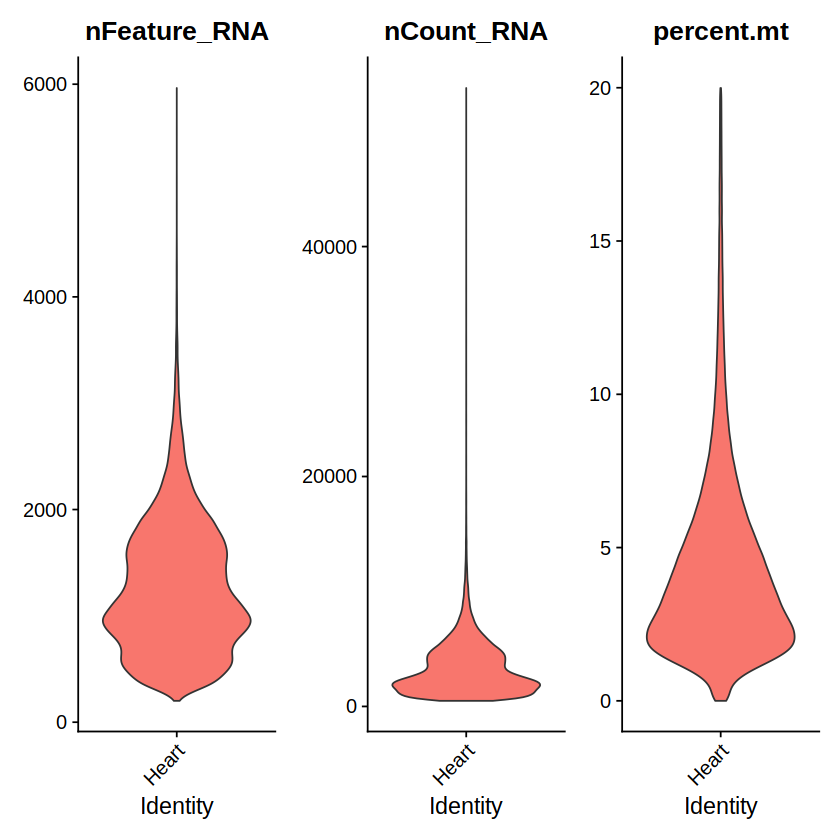

In [128]:
VlnPlot(obj.merged, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3,pt.size = 0)

## Normalization and Scale

In [130]:
obj.merged <- NormalizeData(obj.merged, normalization.method = "LogNormalize", scale.factor = 10000)

In [131]:
obj.merged <- FindVariableFeatures(obj.merged, selection.method = "vst", nfeatures = 2000)

obj.merged <- ScaleData(obj.merged)

Centering and scaling data matrix



In [204]:
quick_process <- function(dataobj){
    dataobj <- FindVariableFeatures(dataobj, selection.method = "vst", nfeatures = 2000)
    dataobj <- ScaleData(dataobj)
    
    dataobj <- RunPCA(dataobj)
    dataobj <- RunUMAP(dataobj,dims = 1:40)
    
    dataobj <- FindNeighbors(dataobj, dims = 1:40)
    return(dataobj)
}

# Dimensionality reduction

PC_ 1 
Positive:  SPARCL1, IGFBP7, GSN, MGP, DCN, PLAC9, TIMP3, SERPING1, CALD1, APOD 
	   CNN3, C1R, SOD3, SPARC, LUM, COL6A1, C1S, SERPINF1, COL1A2, COL6A2 
	   PTRF, FBLN1, CCDC80, LHFP, PTN, MFGE8, ADIRF, NUPR1, IFITM3, C7 
Negative:  CXCR4, CCL5, CCL4, NKG7, DUSP2, CD69, ZFP36L2, GZMH, PRF1, COTL1 
	   PTPRCAP, MT-ATP8, PLEK, IL7R, GZMB, CD8A, CD74, MT-ND4L, SAMSN1, TNFAIP3 
	   RGS1, HLA-DPB1, GNLY, EEF1G, LTB, FCGR3A, GZMK, CD8B, TYROBP, GPR183 
PC_ 2 
Positive:  CCL5, PTPRCAP, MT-ATP8, NKG7, GZMH, PRF1, IL7R, EEF1G, CD8A, MT-ND4L 
	   CD69, CD8B, EEF1A1P5, LTB, GBP5, GZMB, CAV1, FGFBP2, ZFP36L2, PLN 
	   COX7A1, MYL9, GZMK, KLRB1, FABP4, TPM1, MYL2, SLC25A4, CLIC3, GNLY 
Negative:  AIF1, MS4A6A, FCER1G, TYROBP, MS4A7, LYZ, C1QA, NPC2, FTL, C1QC 
	   CST3, GPX1, C1QB, CD14, FCGR2A, LST1, CTSB, VSIG4, HLA-DRA, MAFB 
	   IER3, FTH1, SPI1, PLAUR, SAT1, RNASE6, C5AR1, CXCL8, CD68, CYBB 
PC_ 3 
Positive:  SLC9A3R2, CAV1, FABP5, ID1, ESAM, VWF, RAMP2, EMCN, FABP4, FLT1 
	   TMEM88, EG

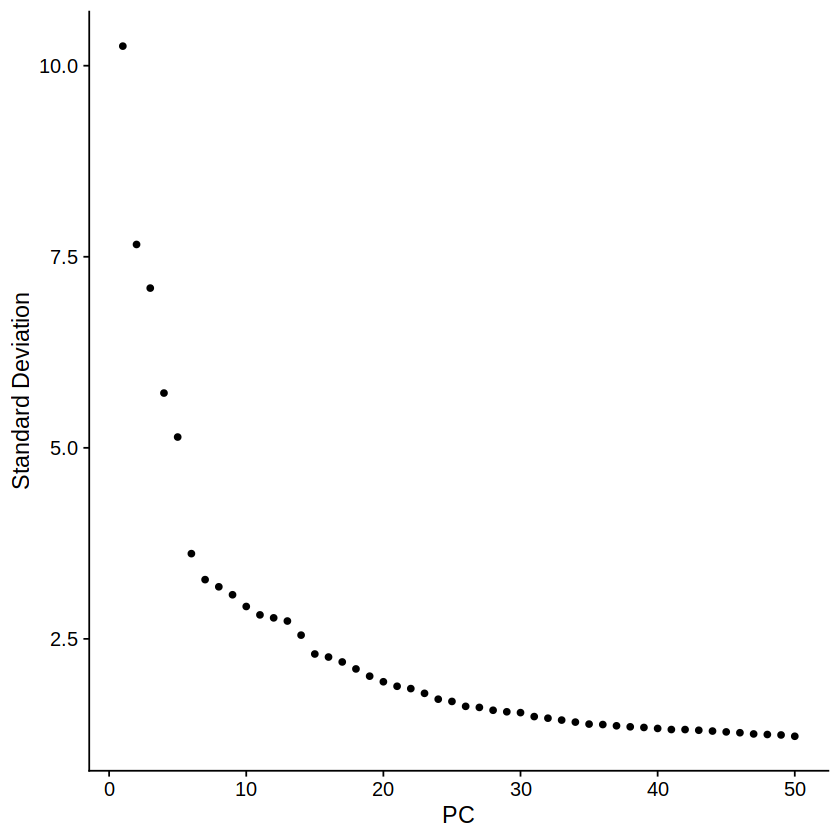

In [132]:
obj.merged <- RunPCA(obj.merged, features = VariableFeatures(object = obj.merged))
ElbowPlot(obj.merged,ndims = 50)

In [133]:
obj.merged <- RunUMAP(obj.merged,dims = 1:40)

16:10:10 UMAP embedding parameters a = 0.9922 b = 1.112

16:10:10 Read 151813 rows and found 40 numeric columns

16:10:10 Using Annoy for neighbor search, n_neighbors = 30

16:10:10 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:10:24 Writing NN index file to temp file /tmp/Rtmptli9Av/file3b8d1a5693917f

16:10:24 Searching Annoy index using 1 thread, search_k = 3000

16:11:11 Annoy recall = 100%

16:11:12 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

16:11:15 Initializing from normalized Laplacian + noise (using irlba)

16:11:39 Commencing optimization for 200 epochs, with 6843062 positive edges

16:12:59 Optimization finished



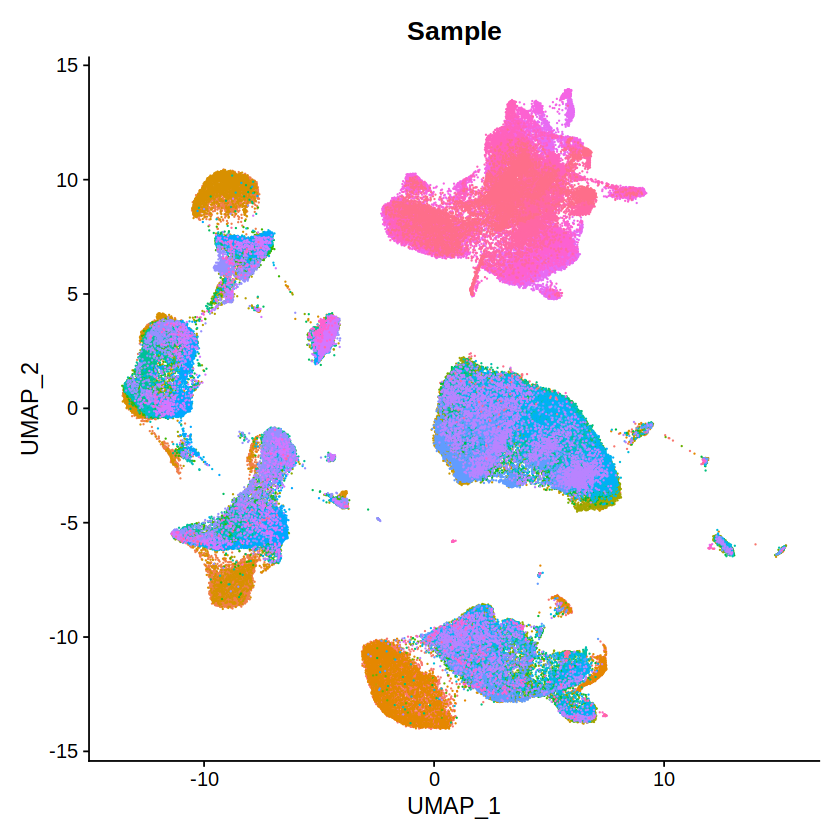

In [137]:
DimPlot(obj.merged,group.by="Sample",raster=FALSE) + NoLegend()

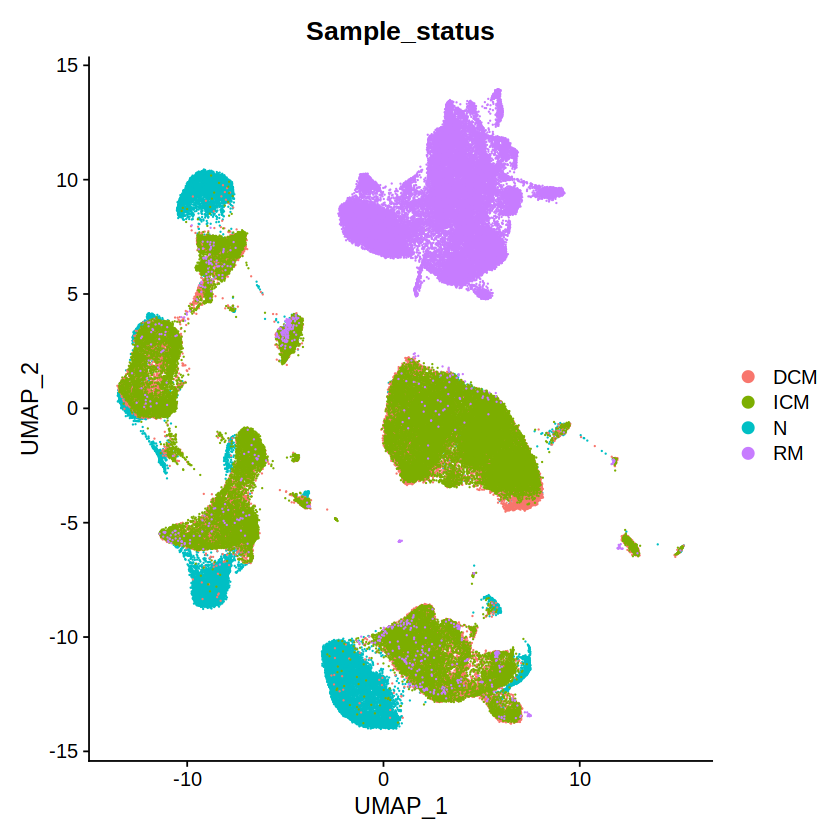

In [135]:
DimPlot(obj.merged,group.by="Sample_status",raster=FALSE)

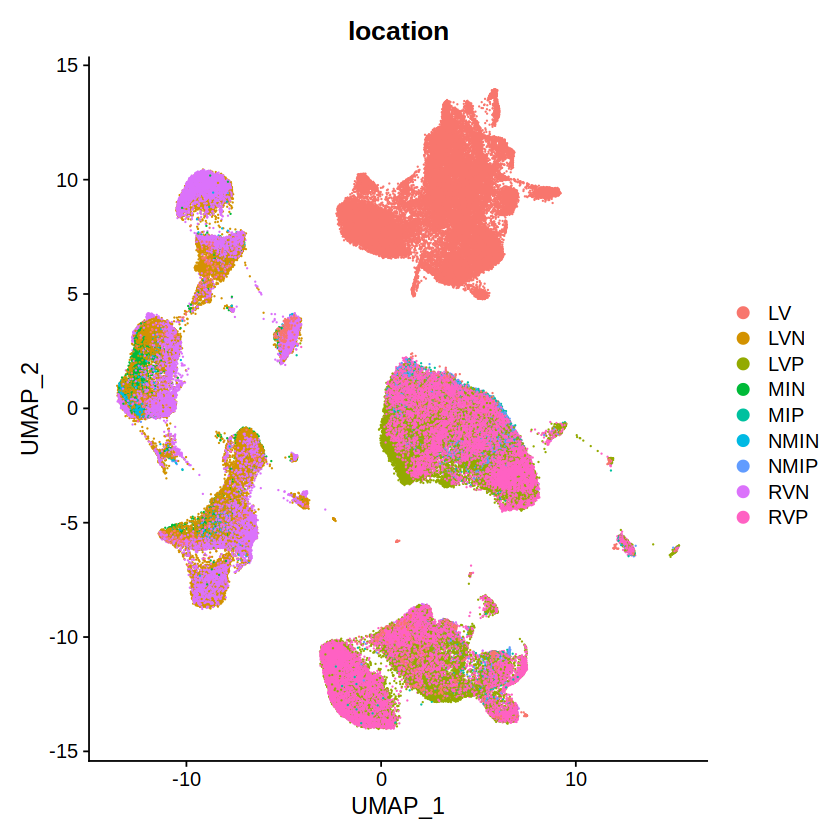

In [136]:
DimPlot(obj.merged,group.by="location",raster=FALSE)

# Cluster

In [138]:
obj.merged <- FindNeighbors(obj.merged, dims = 1:40)

Computing nearest neighbor graph

Computing SNN



In [412]:
obj.merged <- FindClusters(obj.merged, resolution = 0.3)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 151813
Number of edges: 5281443

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9644
Number of communities: 26
Elapsed time: 57 seconds


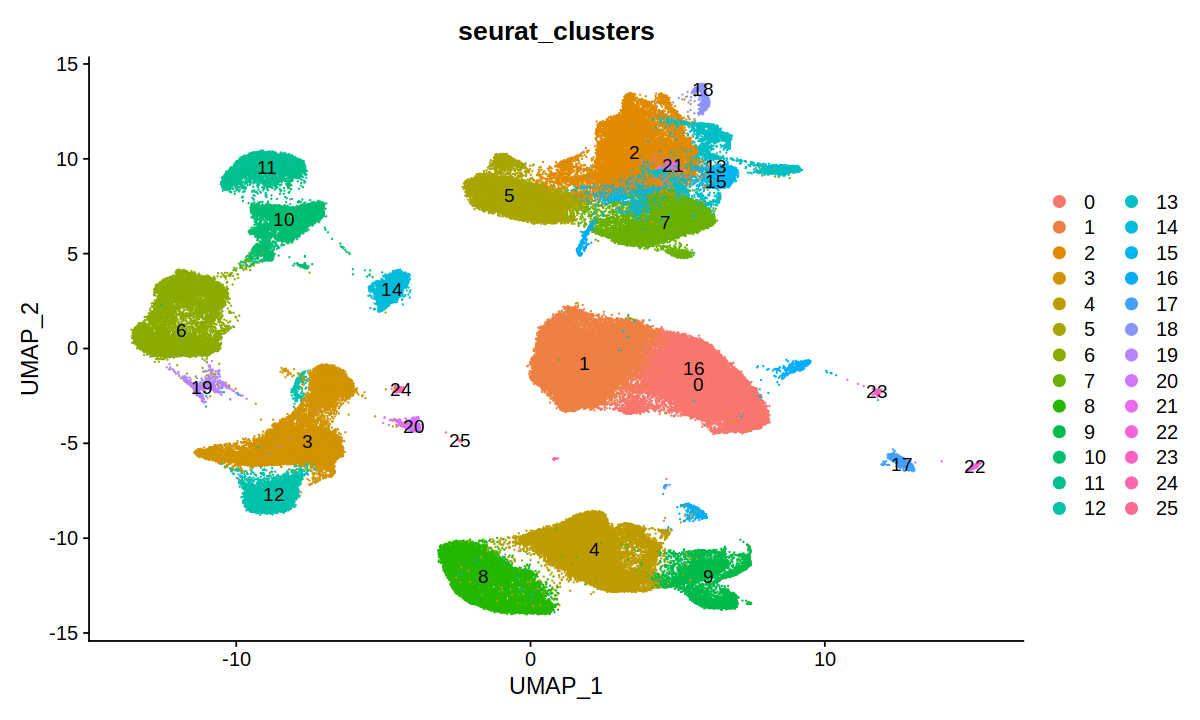

In [413]:
DimPlot(obj.merged,group.by="seurat_clusters",raster=FALSE,label = TRUE)

# Annotation

## Layer 1

### Cardiomyocyte cell

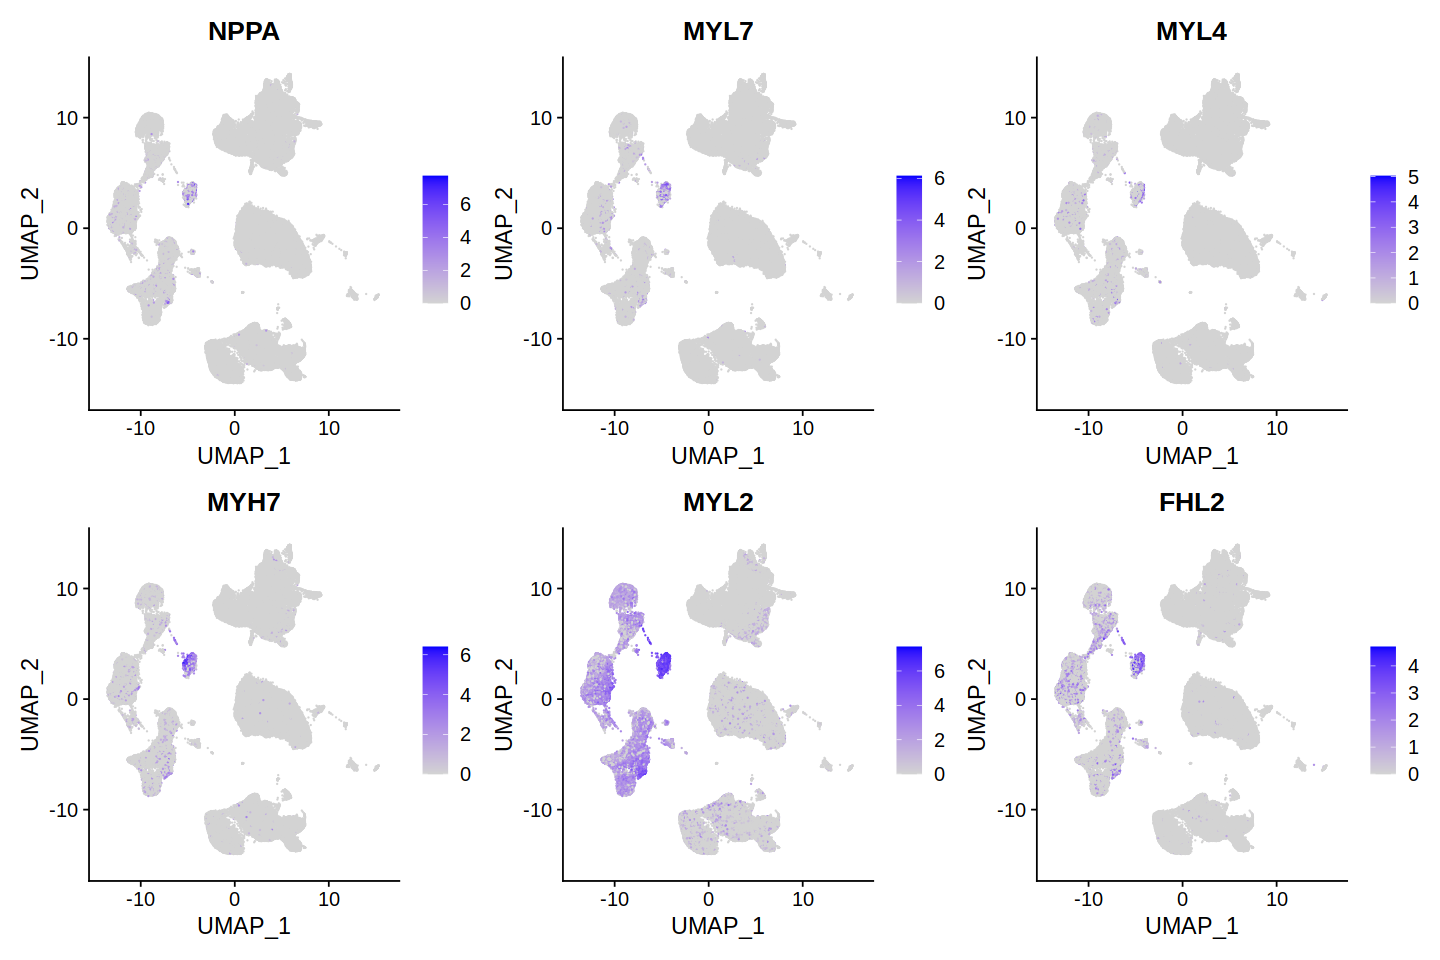

In [143]:
options(repr.plot.width = 12, repr.plot.height = 8)
FeaturePlot(obj.merged,c("NPPA","MYL7","MYL4", "MYH7","MYL2","FHL2"), ncol = 3, raster=FALSE)

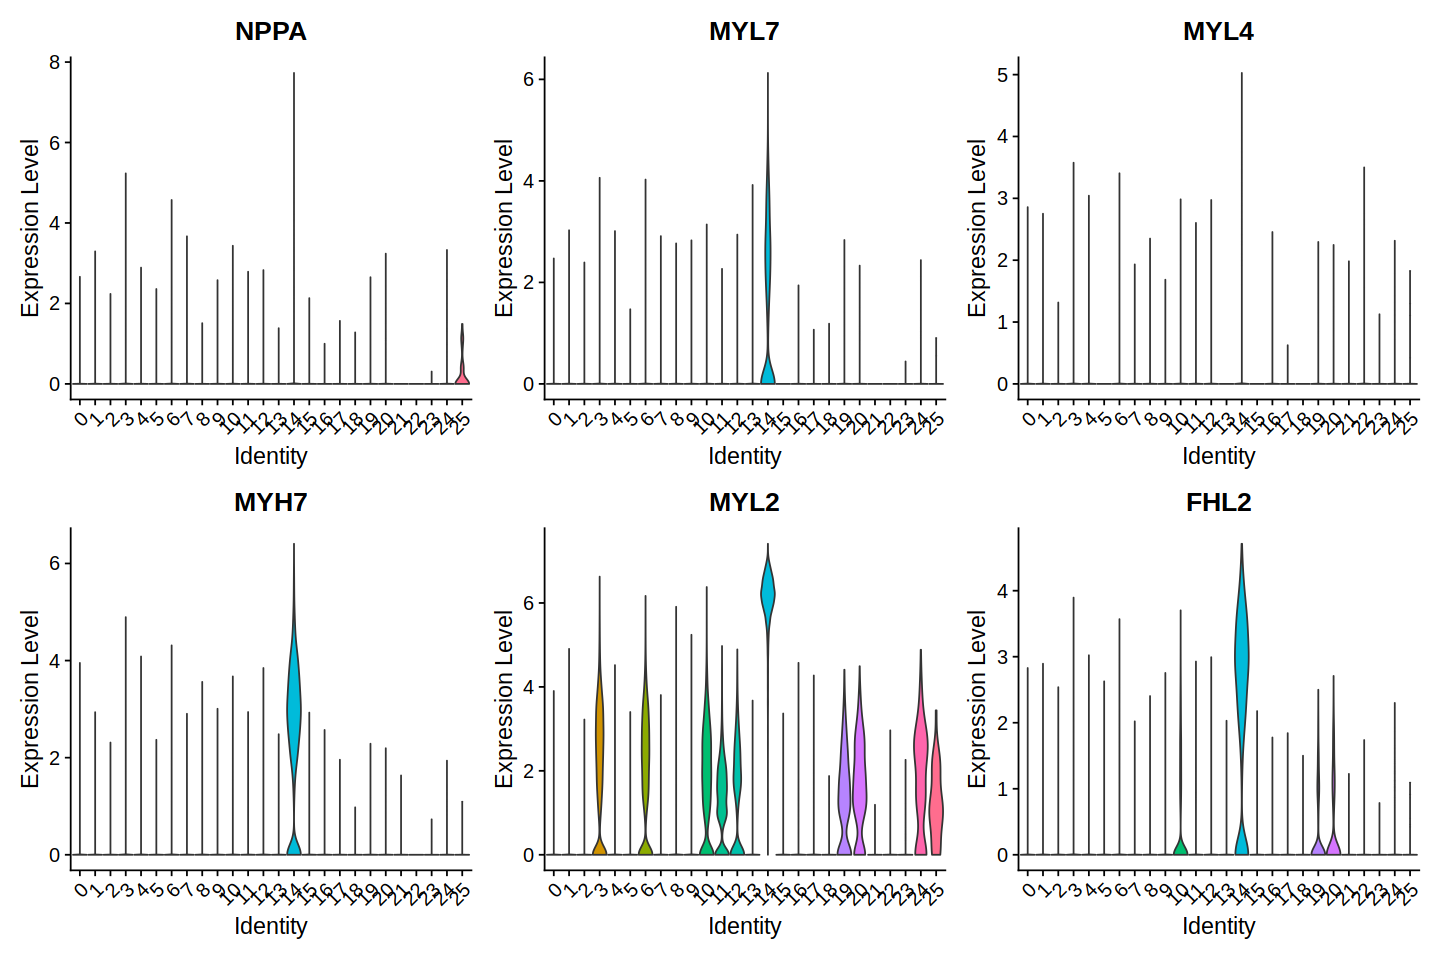

In [145]:
VlnPlot(obj.merged,c("NPPA","MYL7","MYL4", "MYH7","MYL2","FHL2"), ncol = 3, pt.size = 0)

### Endothelial cell

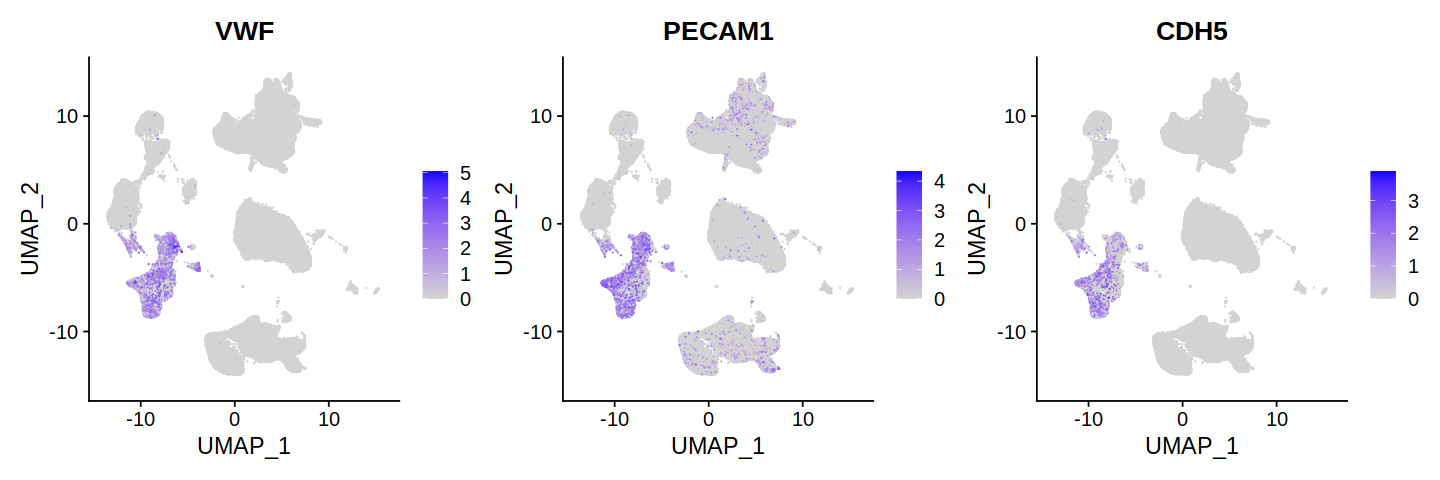

In [148]:
options(repr.plot.width = 12, repr.plot.height = 4)
FeaturePlot(obj.merged,c("VWF","PECAM1","CDH5"), ncol = 3, raster=FALSE)

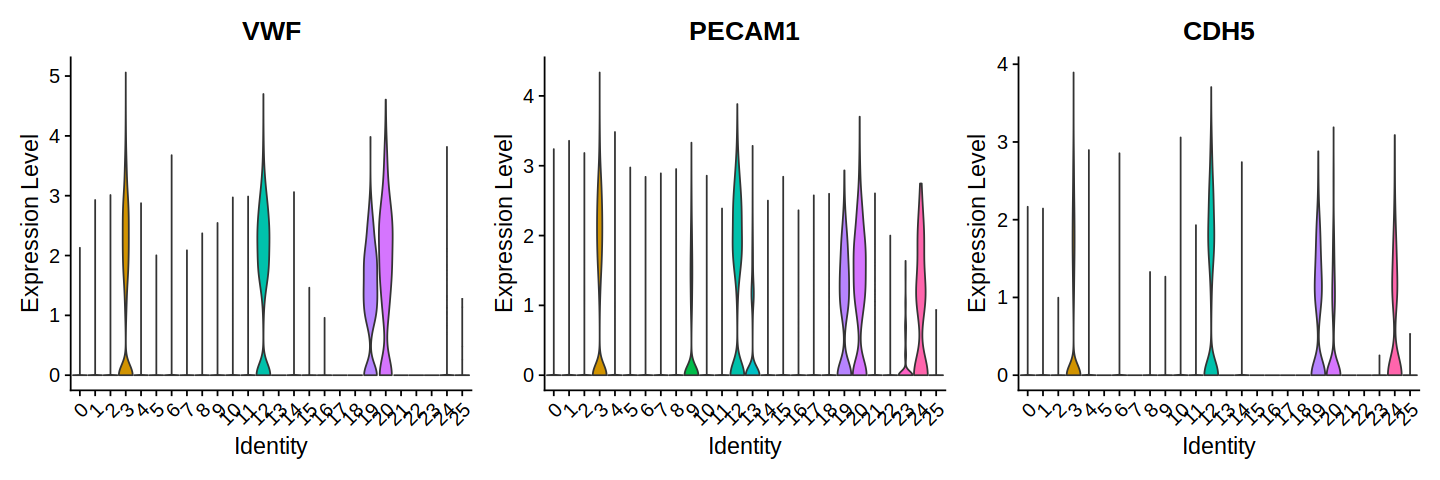

In [149]:
VlnPlot(obj.merged,c("VWF","PECAM1","CDH5"), ncol = 3, pt.size = 0)

### Mesothelial cell

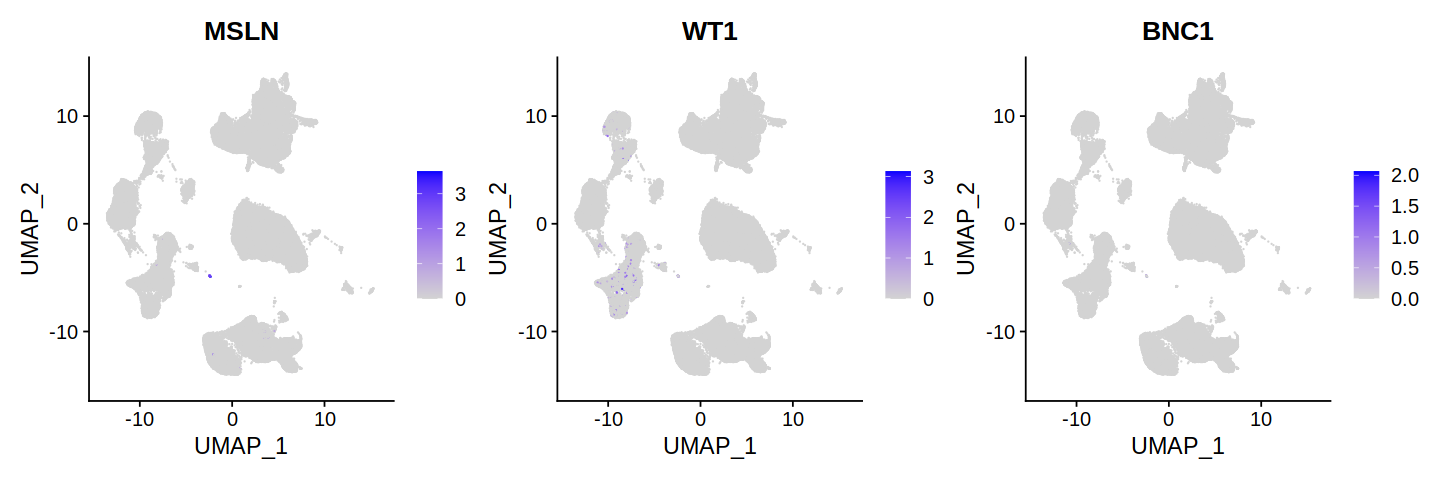

In [174]:
options(repr.plot.width = 12, repr.plot.height = 4)
FeaturePlot(obj.merged,c("MSLN","WT1","BNC1"), ncol = 3, raster=FALSE)

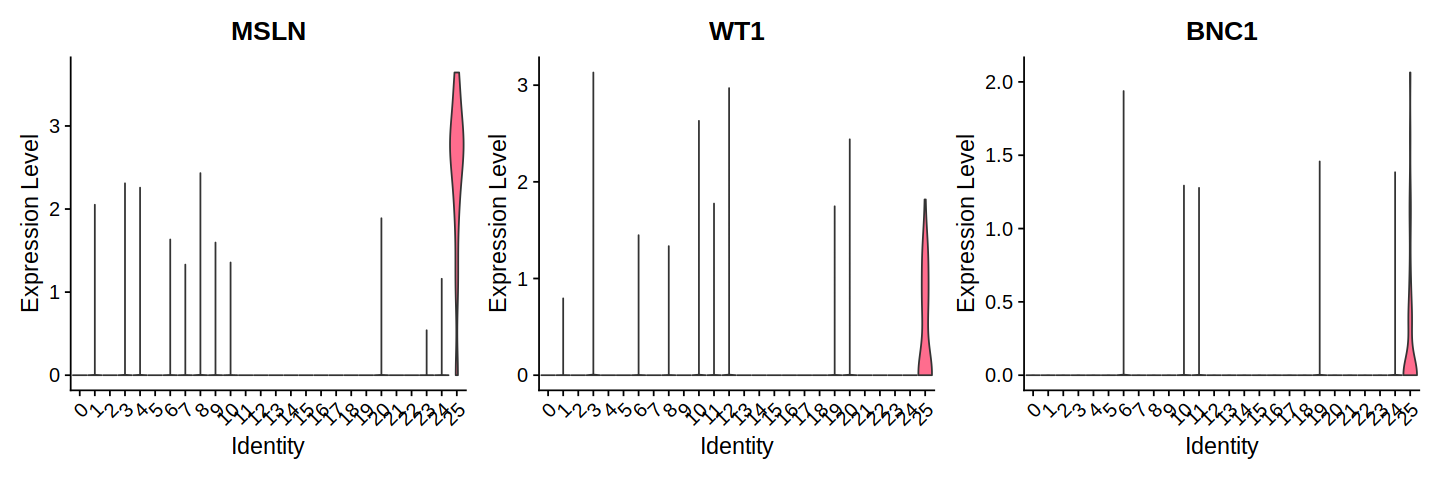

In [175]:
VlnPlot(obj.merged,c("MSLN","WT1","BNC1"), ncol = 3, pt.size = 0)

### Epicardial cell

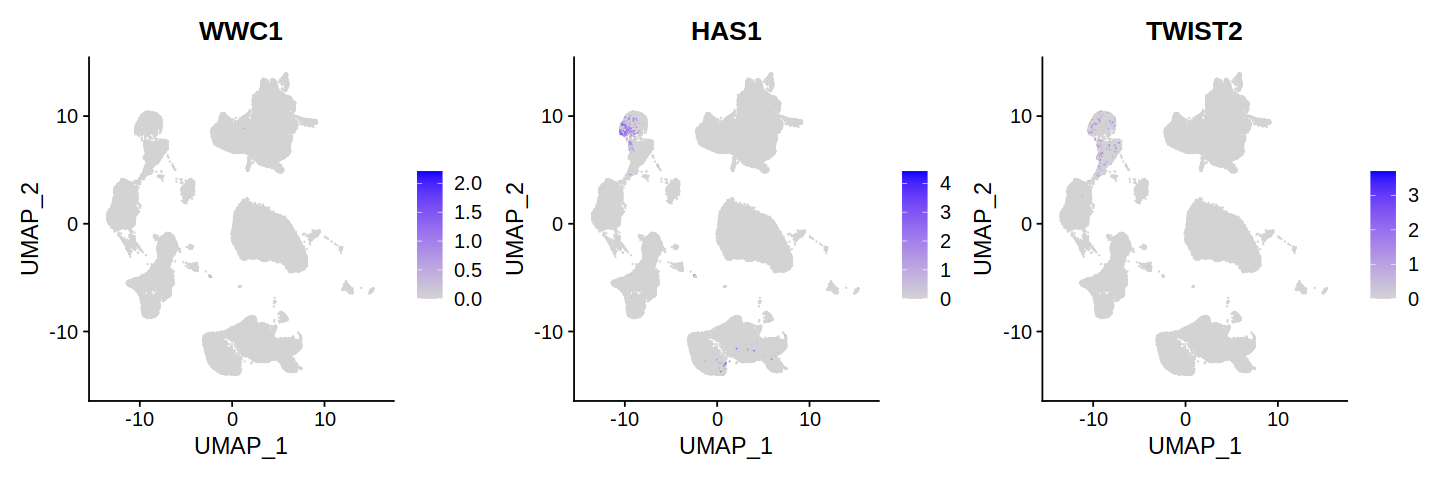

In [152]:
options(repr.plot.width = 12, repr.plot.height = 4)
FeaturePlot(obj.merged,c("WWC1","HAS1","TWIST2"), ncol = 3, raster=FALSE)

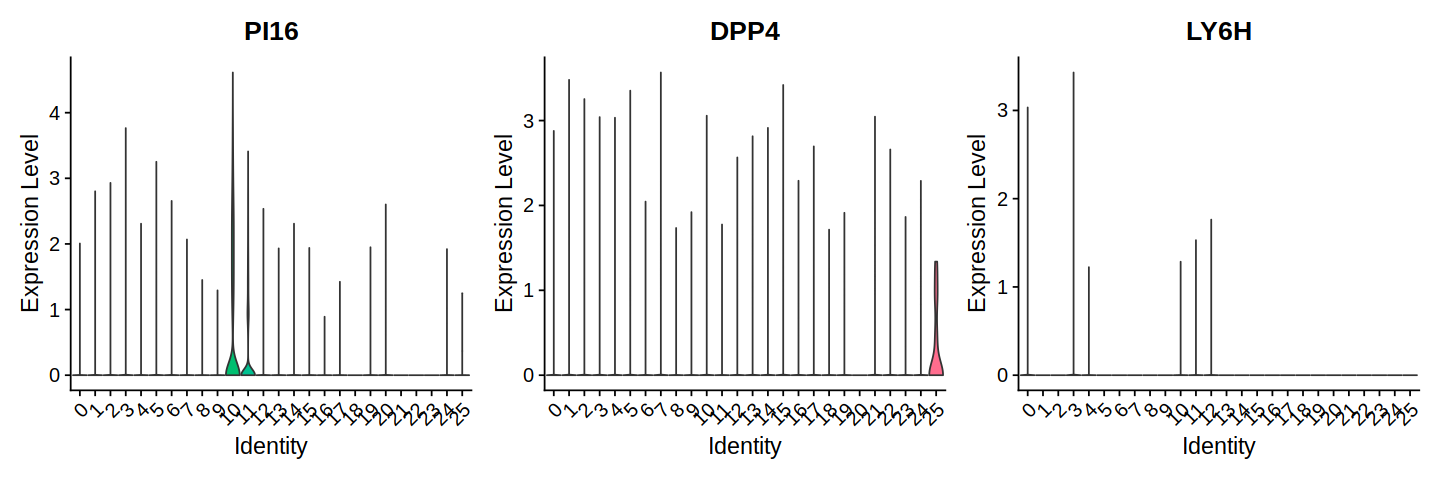

In [151]:
VlnPlot(obj.merged,c("WWC1","HAS1","TWIST2"), ncol = 3, pt.size = 0)

### Smooth muscle cell

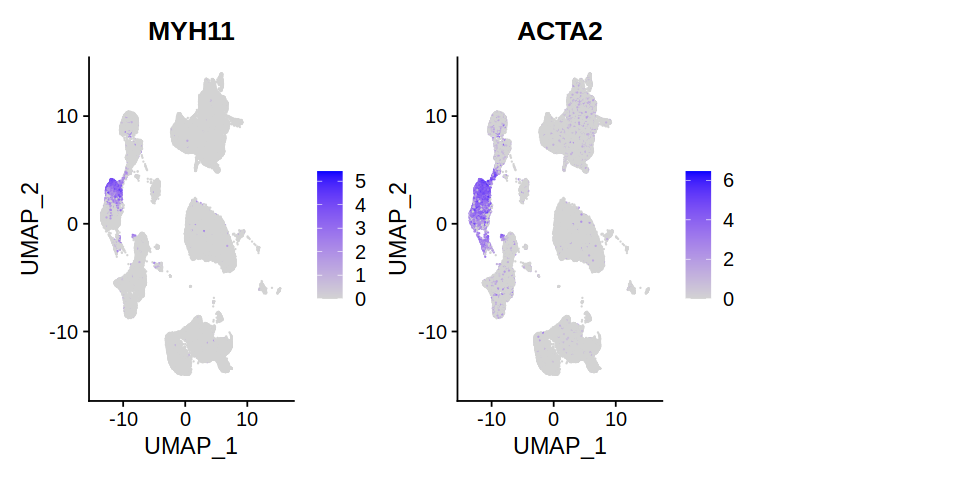

In [157]:
options(repr.plot.width = 8, repr.plot.height = 4)
FeaturePlot(obj.merged,c("MYH11","ACTA2"), ncol = 3, raster=FALSE)

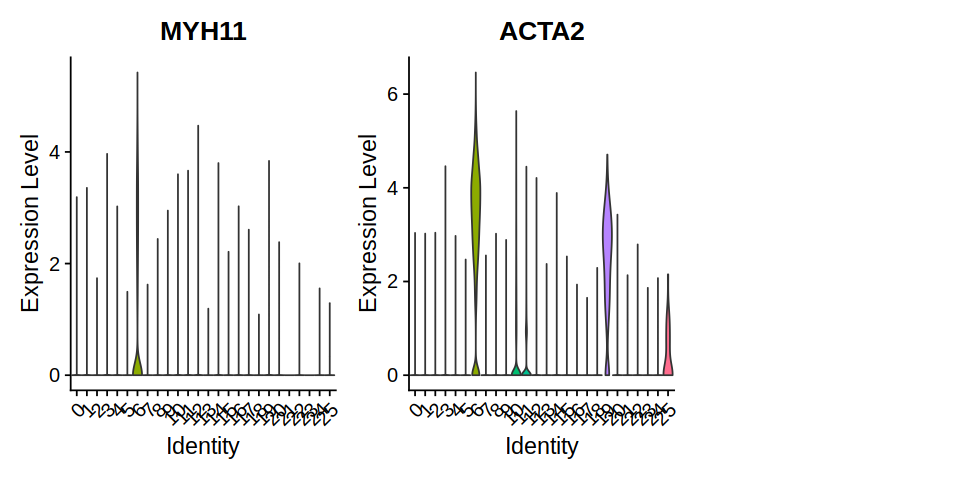

In [158]:
VlnPlot(obj.merged,c("MYH11","ACTA2"), ncol = 3, pt.size = 0)

### Pericyte

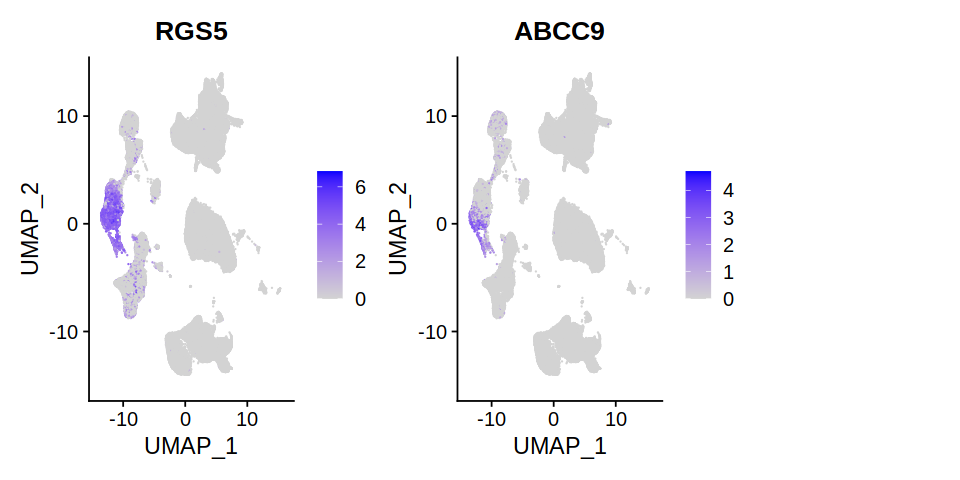

In [159]:
options(repr.plot.width = 8, repr.plot.height = 4)
FeaturePlot(obj.merged,c("RGS5","ABCC9"), ncol = 3, raster=FALSE)

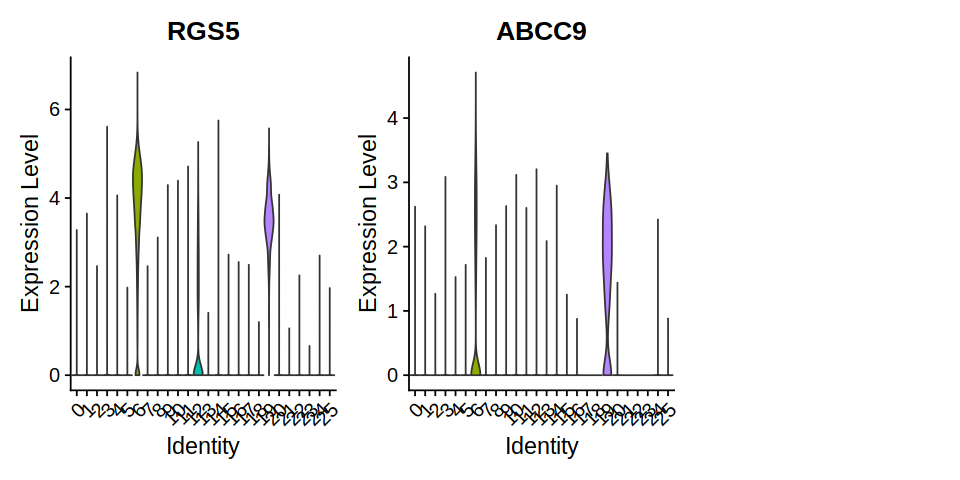

In [160]:
VlnPlot(obj.merged,c("RGS5","ABCC9"), ncol = 3, pt.size = 0)

### Adipocyte

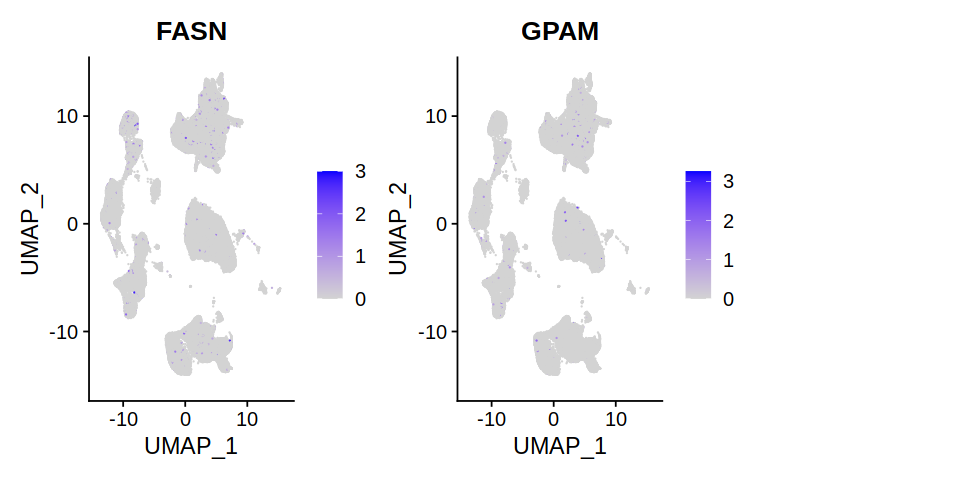

In [165]:
options(repr.plot.width = 8, repr.plot.height = 4)
FeaturePlot(obj.merged,c("FASN","GPAM"), ncol = 3, raster=FALSE)

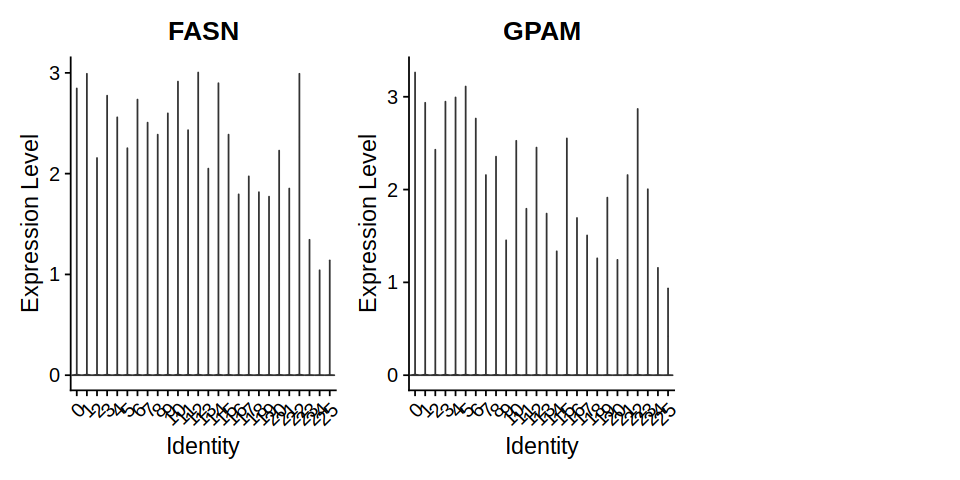

In [162]:
VlnPlot(obj.merged,c("FASN","GPAM"), ncol = 3, pt.size = 0)

### Fibroblast

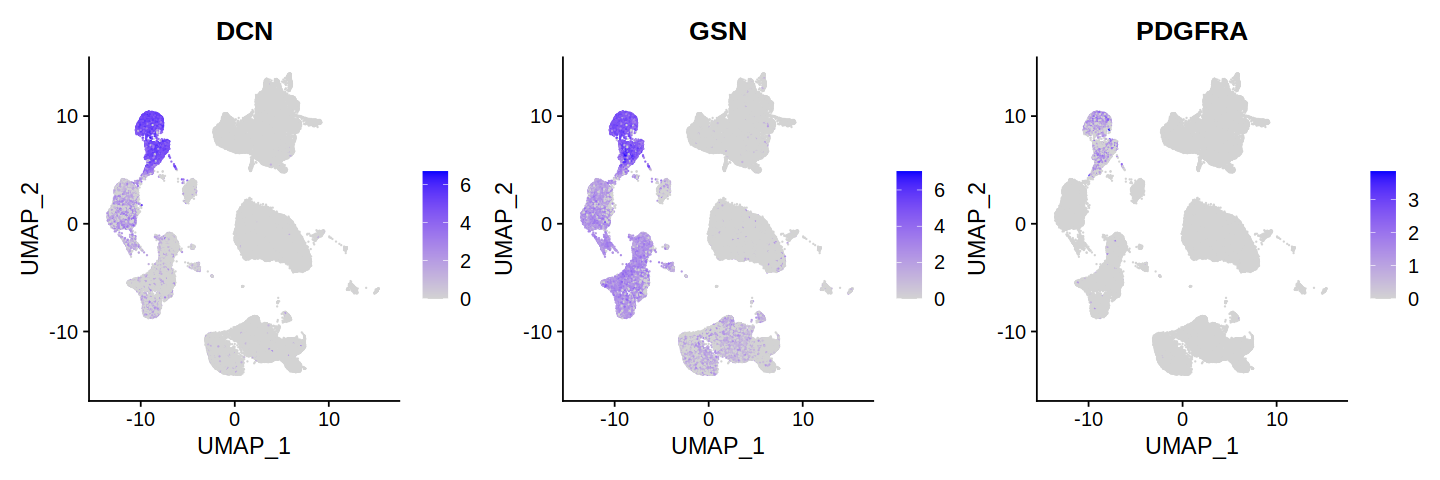

In [171]:
options(repr.plot.width = 12, repr.plot.height = 4)
FeaturePlot(obj.merged,c("DCN","GSN","PDGFRA"), ncol = 3, raster=FALSE)

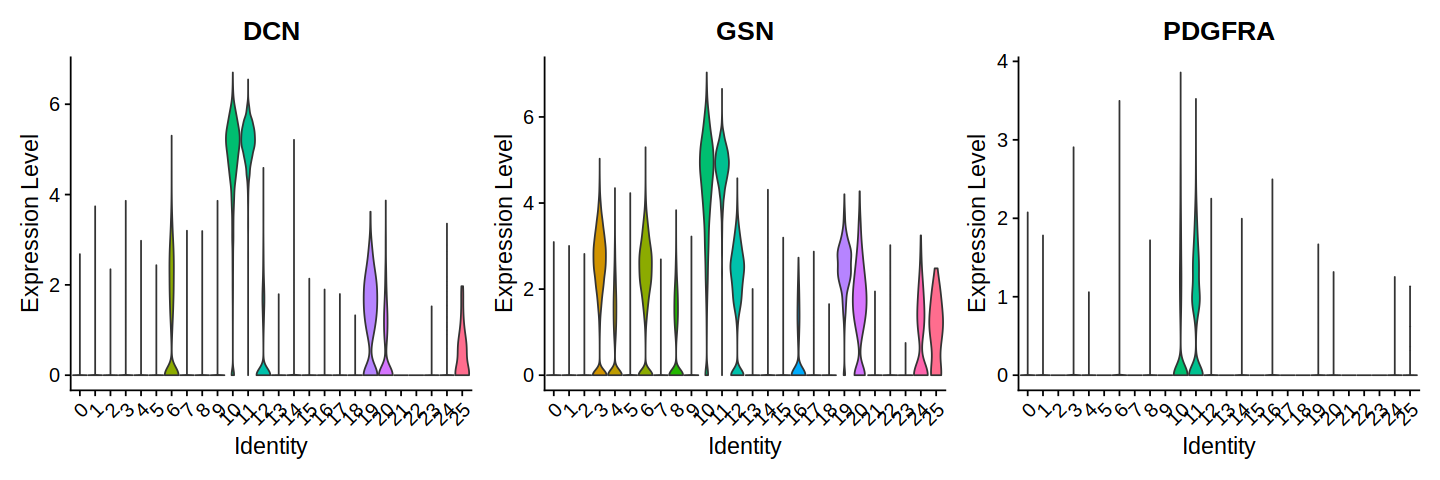

In [172]:
VlnPlot(obj.merged,c("DCN","GSN","PDGFRA"), ncol = 3, pt.size = 0)

### Myeloid cell

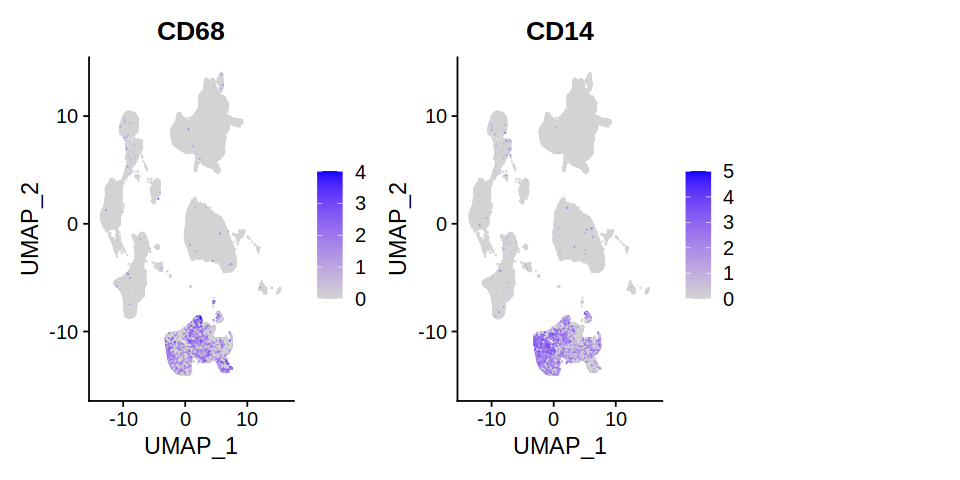

In [176]:
options(repr.plot.width = 8, repr.plot.height = 4)
FeaturePlot(obj.merged,c("CD68","CD14"), ncol = 3, raster=FALSE)

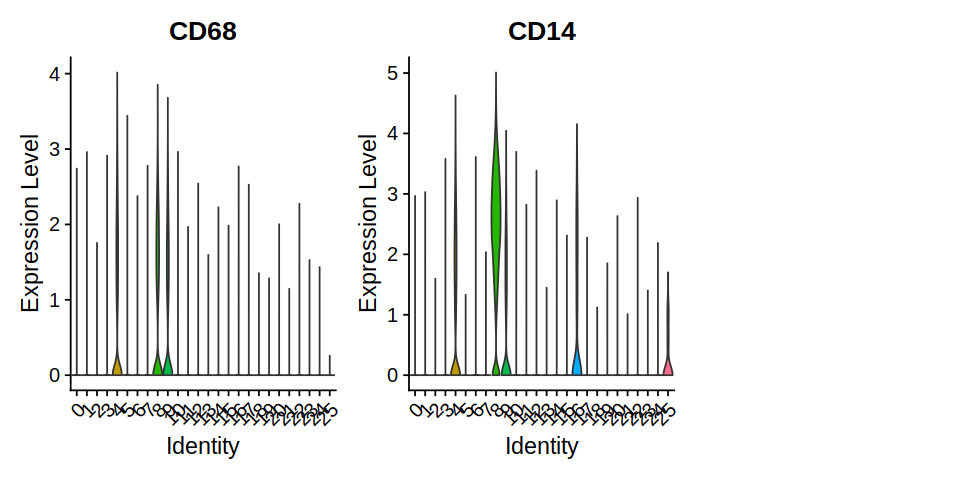

In [177]:
VlnPlot(obj.merged,c("CD68","CD14"), ncol = 3, pt.size = 0)

### Lymphoid cell

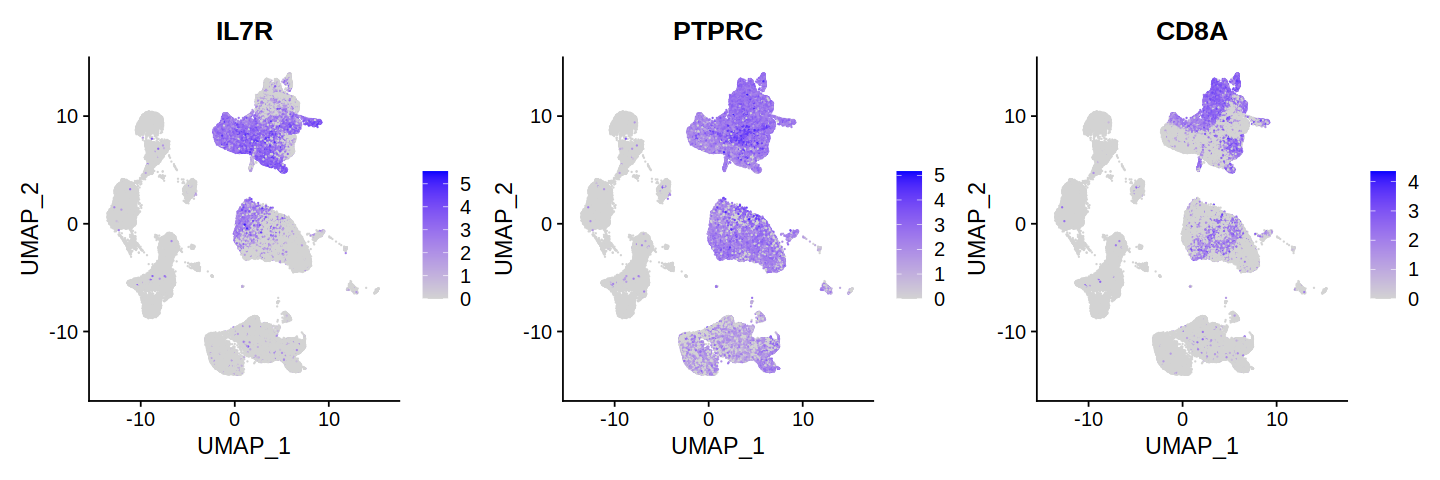

In [178]:
options(repr.plot.width = 12, repr.plot.height = 4)
FeaturePlot(obj.merged,c("IL7R","PTPRC","CD8A"), ncol = 3, raster=FALSE)

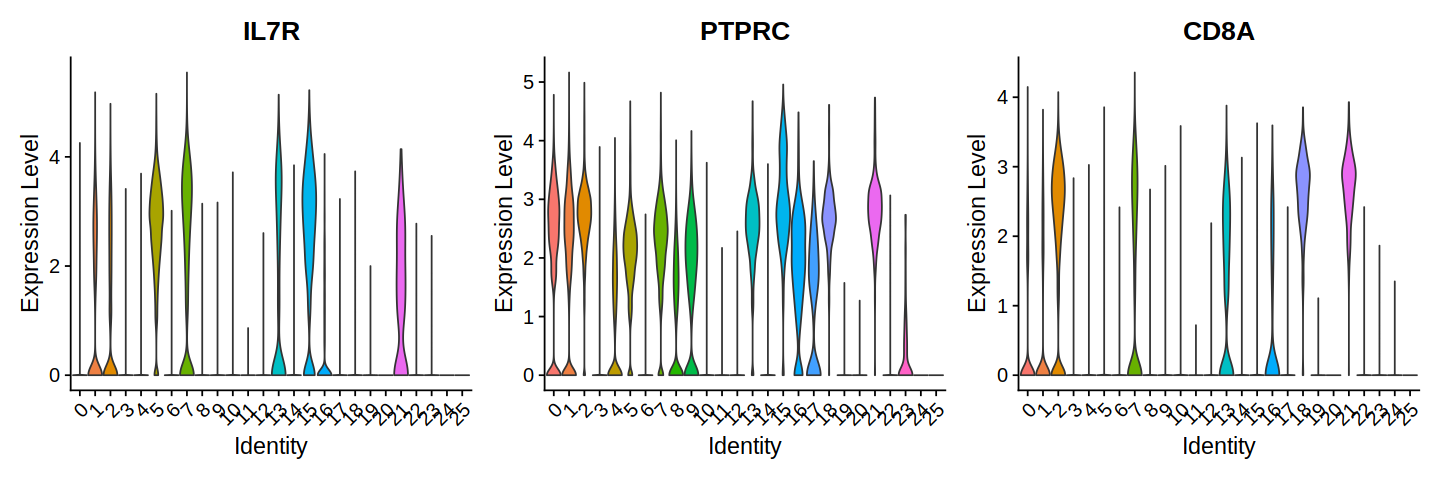

In [179]:
VlnPlot(obj.merged,c("IL7R","PTPRC","CD8A"), ncol = 3, pt.size = 0)

### Neuroglial cell

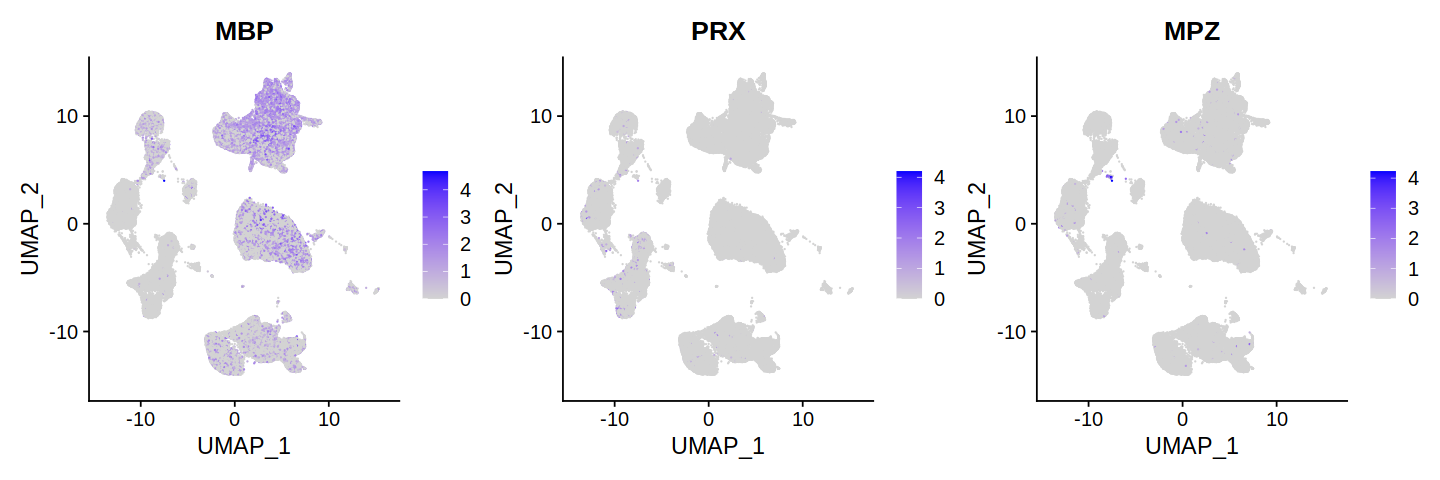

In [180]:
options(repr.plot.width = 12, repr.plot.height = 4)
FeaturePlot(obj.merged,c("MBP","PRX","MPZ"), ncol = 3, raster=FALSE)

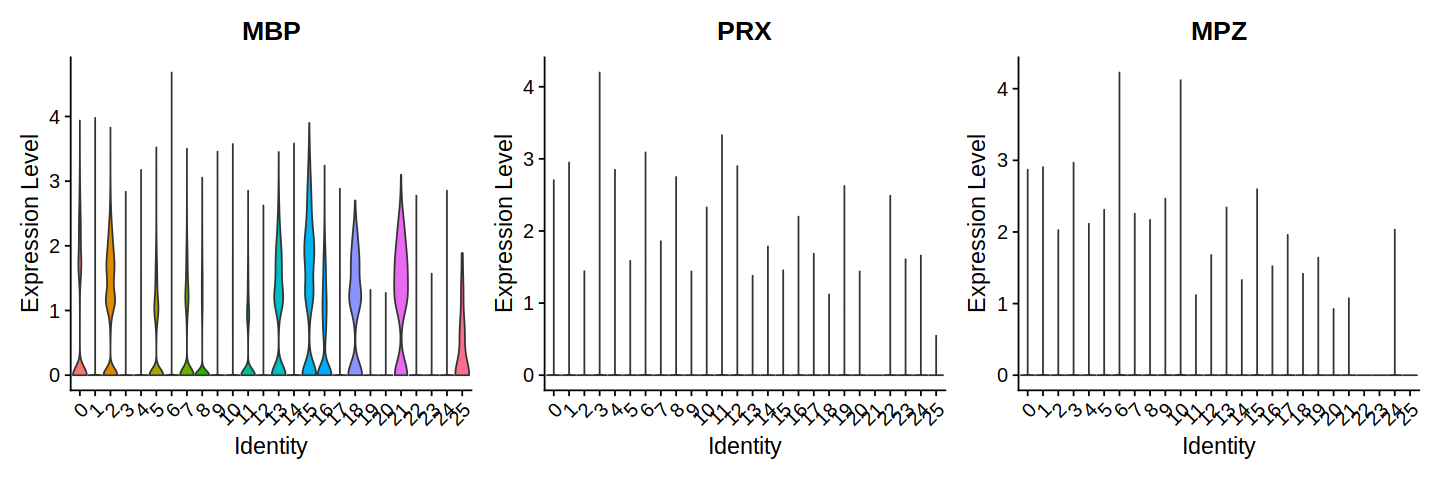

In [181]:
VlnPlot(obj.merged,c("MBP","PRX","MPZ"), ncol = 3, pt.size = 0)

### Neuron

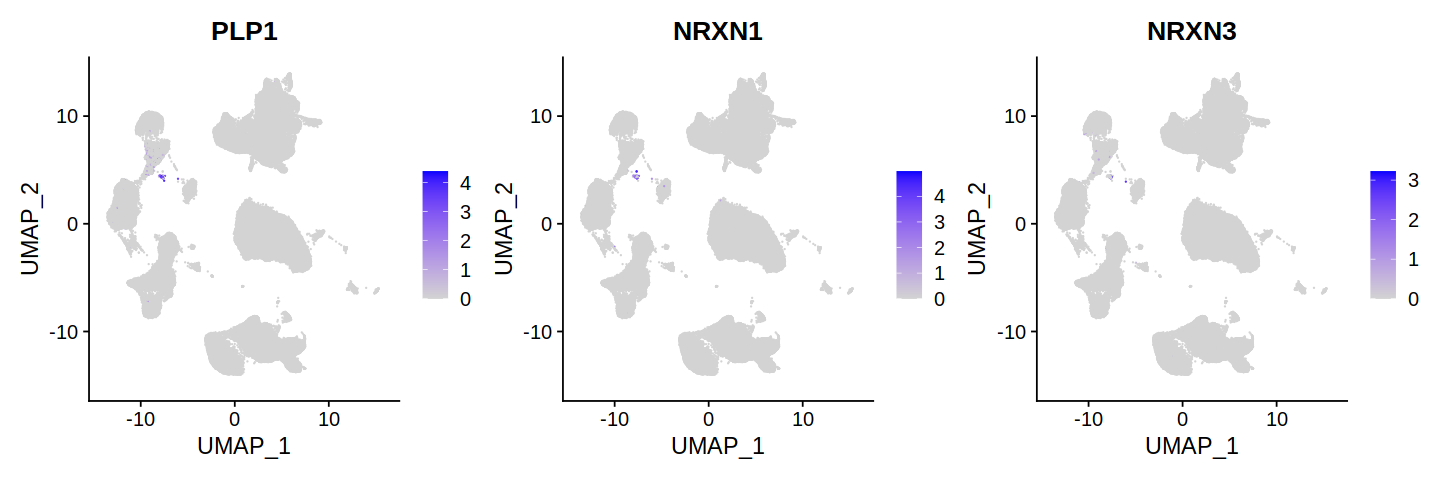

In [182]:
options(repr.plot.width = 12, repr.plot.height = 4)
FeaturePlot(obj.merged,c("PLP1","NRXN1","NRXN3"), ncol = 3, raster=FALSE)

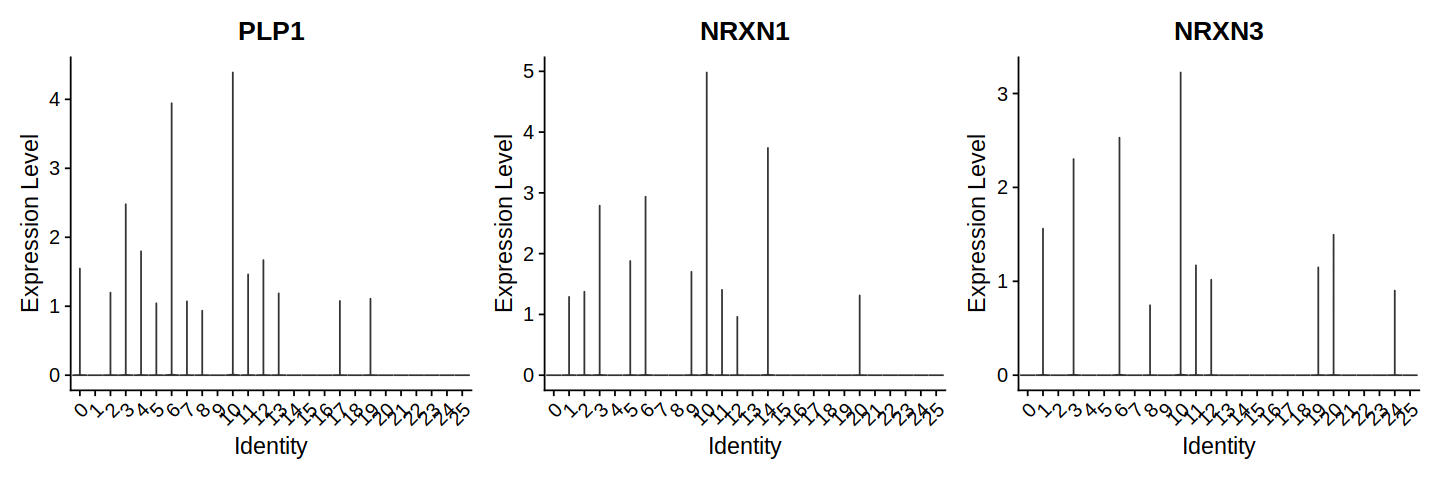

In [183]:
VlnPlot(obj.merged,c("PLP1","NRXN1","NRXN3"), ncol = 3, pt.size = 0)

In [418]:
Idents(obj.merged) <- "seurat_clusters"

In [419]:
obj.merged <- RenameIdents(obj.merged,'14'="Cardiomyocyte cell")
obj.merged <- RenameIdents(obj.merged,'3'="Endothelial cell",'12'="Endothelial cell",'20'="Endothelial cell",'24'="Endothelial cell")
obj.merged <- RenameIdents(obj.merged,'19'="Pericyte")
obj.merged <- RenameIdents(obj.merged,'25'="Mesothelial cell")
obj.merged <- RenameIdents(obj.merged,'6'="Smooth muscle cell/Pericyte")
obj.merged <- RenameIdents(obj.merged,'10'="Fibroblast",'11'="Fibroblast")
obj.merged <- RenameIdents(obj.merged,'4'="Myeloid cell",'8'="Myeloid cell",'9'="Myeloid cell",'16'="Myeloid cell")
obj.merged <- RenameIdents(obj.merged,'0'="Lymphoid cell",'1'="Lymphoid cell",'2'="Lymphoid cell",'5'="Lymphoid cell",'7'="Lymphoid cell",'13'="Lymphoid cell",'15'="Lymphoid cell",'17'="Lymphoid cell",'18'="Lymphoid cell",'21'="Lymphoid cell")
obj.merged <- RenameIdents(obj.merged,'23'="Unknown",'22'="Unknown")

In [429]:
obj.merged$Layer1 <- as.character(Idents(obj.merged))

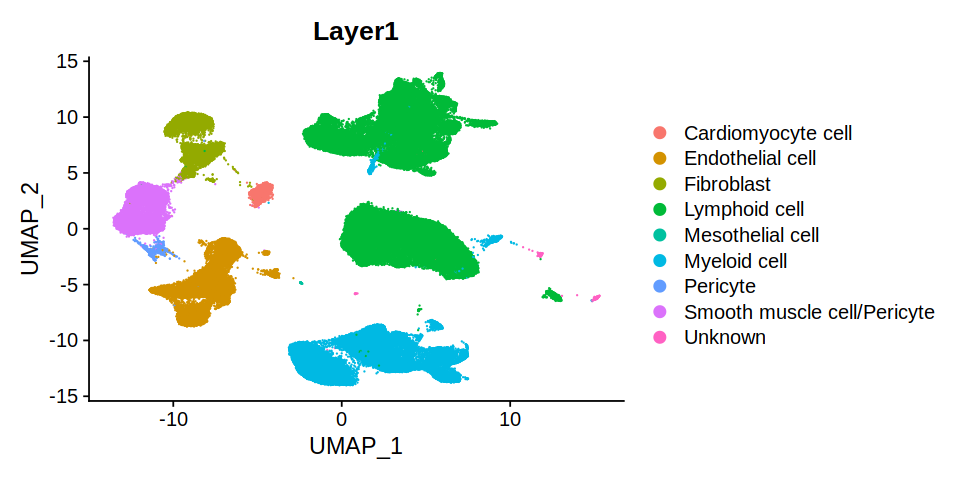

In [430]:
options(repr.plot.width = 8, repr.plot.height = 4)
DimPlot(obj.merged, raster=FALSE,group.by = "Layer1")

### Smooth muscle cell & Pericyte

In [422]:
subobj <- subset(obj.merged,Layer1=="Smooth muscle cell/Pericyte")

In [423]:
subobj

An object of class Seurat 
58233 features across 10060 samples within 1 assay 
Active assay: RNA (58233 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

In [424]:
subobj <- quick_process(subobj)
subobj <- FindClusters(subobj,resolution = 0.2)

Centering and scaling data matrix

PC_ 1 
Positive:  CD36, APOD, ABCC9, IFITM1, CYGB, KCNJ8, THBS4, AGT, FABP5, FABP4 
	   STEAP4, GGT5, LPL, ASPN, MYL2, SDPR, AGAP2, CPM, COL3A1, PLXDC1 
	   SLC12A2, DCBLD1, PROCR, FLT1, GPAT2, ADGRF5, CD38, FBLN1, LTBP4, ENPP1 
Negative:  MYH11, TAGLN, SORBS2, TPM2, DSTN, CSRP1, CNN1, LBH, PALLD, ITGA8 
	   CCDC3, NET1, MYLK, RERGL, NTRK2, NDUFA4, PHLDA2, GADD45B, CLU, C11orf96 
	   ACTN1, CASQ2, KCNMB1, PPP1R12B, VIM, ACTA2, S100A6, MYL9, PLN, MYL6 
PC_ 2 
Positive:  PLN, ADIRF, NDUFA4, MYL2, RERGL, CRIP1, AC097724.3, MYL9, RGCC, MYH11 
	   DSTN, SORBS2, TNNI3, CLU, S100A6, TAGLN, GADD45G, KCNA5, MTND2P28, KCNMB1 
	   CASQ2, CSDC2, TPM2, RPL10P9, TPM1, PTN, MUSTN1, TNNC1, TNNT2, CKB 
Negative:  ADAMTS4, JUNB, ADAMTS1, JUN, FOSB, NEAT1, FOS, NR4A1, ZFP36, SOCS3 
	   ATF3, CEBPD, PPP1R15A, MYC, DNAJB1, CCL2, SLC2A3, CRISPLD2, EGR1, HLA-E 
	   ABCC9, IER2, HSP90AA1, RGS16, VMP1, INTS6, HNRNPU, ZFP36L1, BCL6, COL1A2 
PC_ 3 
Positive:  FABP4, IGF2, PTN, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10060
Number of edges: 416560

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9129
Number of communities: 8
Elapsed time: 1 seconds


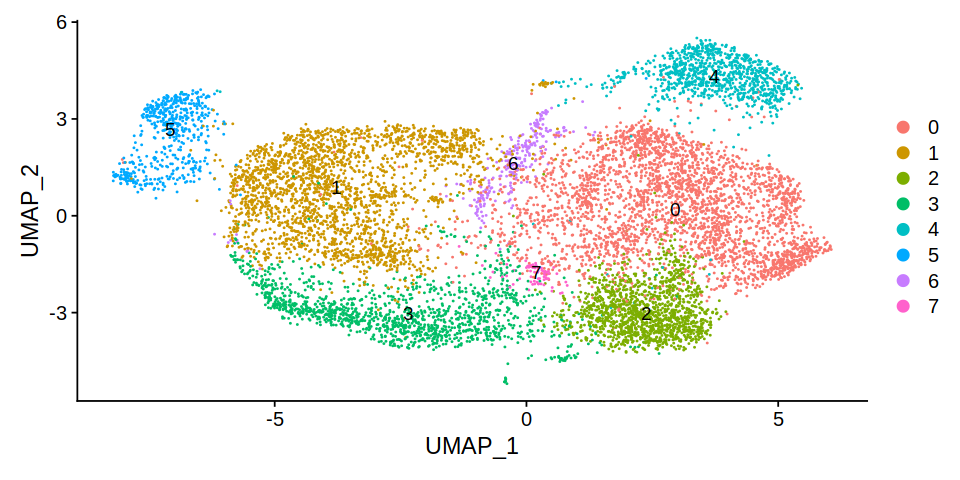

In [425]:
DimPlot(subobj,label = TRUE)

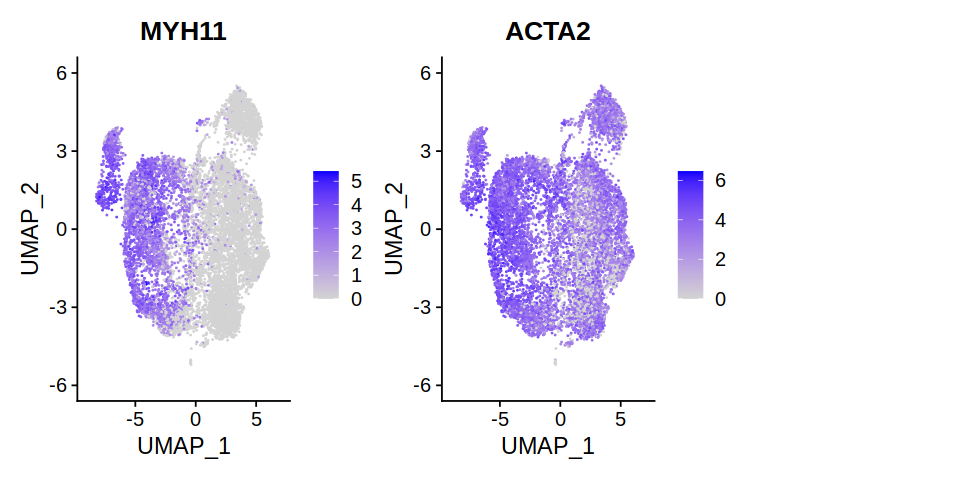

In [324]:
options(repr.plot.width = 8, repr.plot.height = 4)
FeaturePlot(subobj,c("MYH11","ACTA2"), ncol = 3, raster=FALSE)

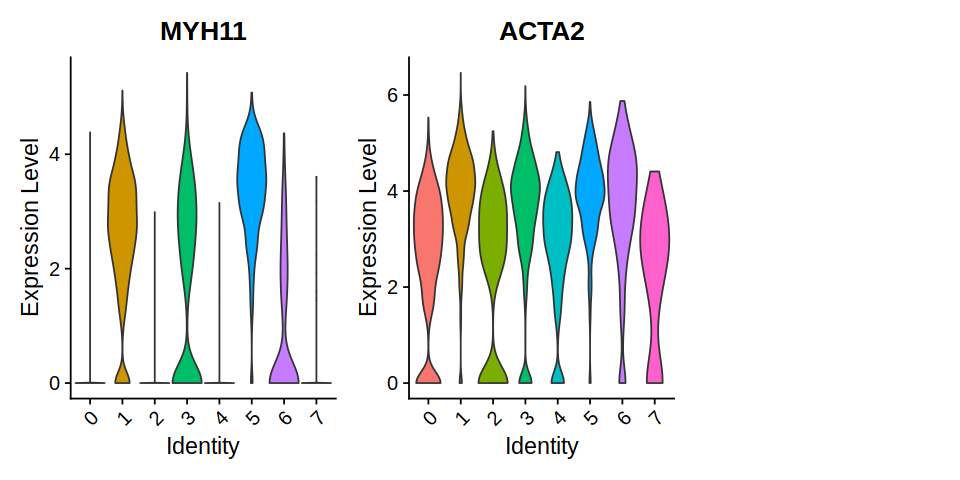

In [326]:
VlnPlot(subobj,c("MYH11","ACTA2"), ncol = 3, pt.size = 0)

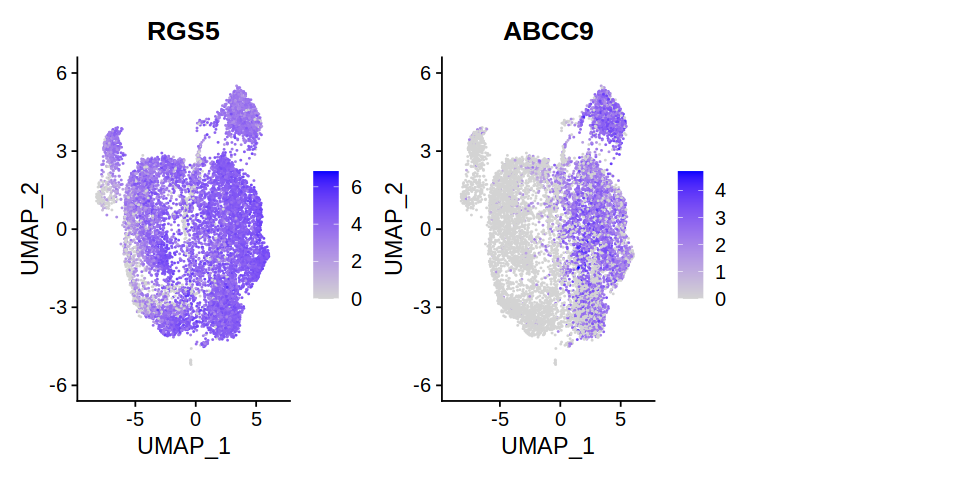

In [325]:
options(repr.plot.width = 8, repr.plot.height = 4)
FeaturePlot(subobj,c("RGS5","ABCC9"), ncol = 3, raster=FALSE)

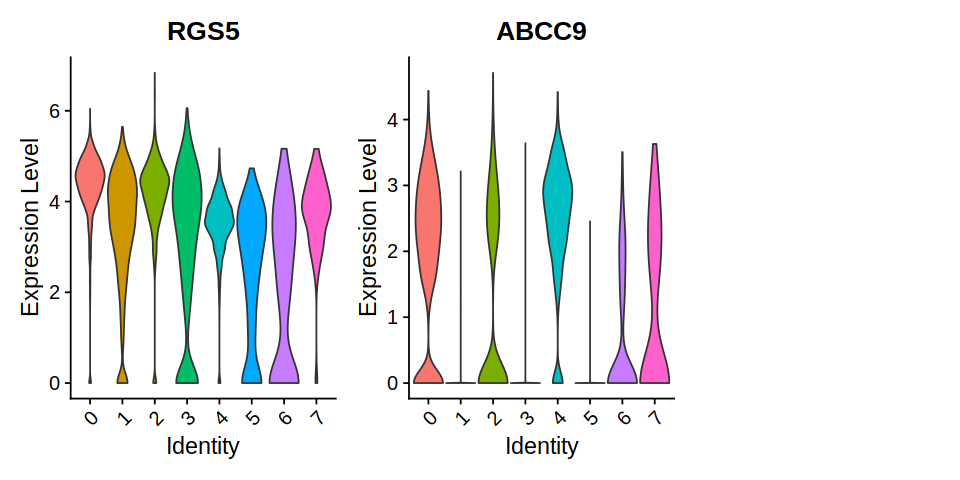

In [327]:
VlnPlot(subobj,c("RGS5","ABCC9"), ncol = 3, pt.size = 0)

In [426]:
subobj <- RenameIdents(subobj,'1'="Smooth muscle cell",'3'="Smooth muscle cell",'5'="Smooth muscle cell",'6'="Smooth muscle cell")
subobj <- RenameIdents(subobj,'0'="Pericyte",'2'="Pericyte",'4'="Pericyte",'7'="Pericyte")

In [431]:
subobj$Layer1 <- as.character(Idents(subobj))
obj.merged@meta.data[row.names(subobj[[]]),"Layer1"] <- subobj$Layer1

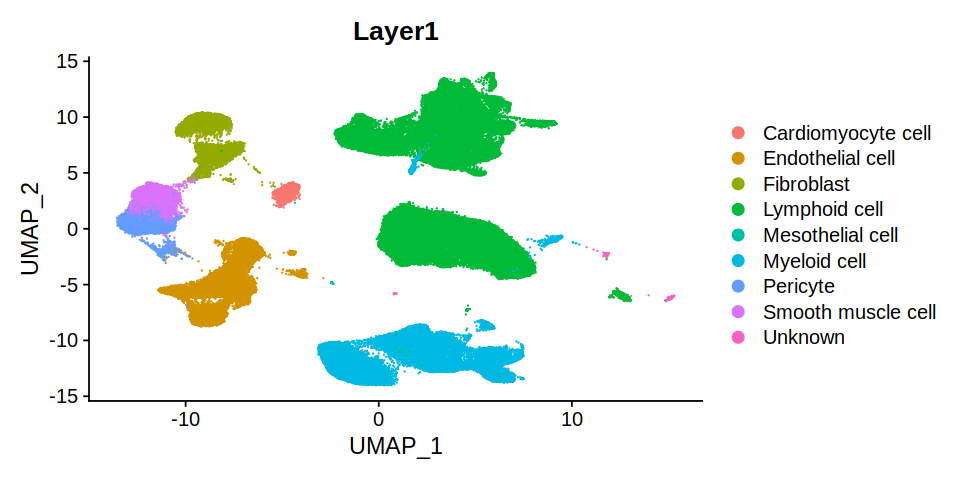

In [432]:
options(repr.plot.width = 8, repr.plot.height = 4)
DimPlot(obj.merged, raster=FALSE,group.by = "Layer1")

## Layer 2

In [237]:
obj.merged$Layer1 <- as.character(obj.merged$Layer1)
obj.merged$Layer2 <- obj.merged$Layer1

### Endothelial subtypes

In [202]:
subobj <- subset(obj.merged,Layer1=="Endothelial cell")

In [203]:
subobj

An object of class Seurat 
58233 features across 18102 samples within 1 assay 
Active assay: RNA (58233 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

In [205]:
subobj <- quick_process(subobj)
subobj <- FindClusters(subobj,resolution = 0.25)

Centering and scaling data matrix

PC_ 1 
Positive:  RGCC, TNNT3, CD36, FABP4, CA4, TPM1, H19, MYL2, LGALS1, IL32 
	   FMO2, C8orf4, TNNI3, LPL, CD300LG, CYP4B1, RBP7, IGF2, TNNC1, APOD 
	   TNNT2, IGFBP2, COX6A2, MB, TIMP4, MYL3, FCN3, TCAP, ACTC1, PLN 
Negative:  CLU, FOS, VIM, GAS5, POSTN, NNMT, TIMP1, RPS2, ACKR1, TFPI 
	   EEF1A1, ADIRF, PLVAP, RPLP0, CCL14, IL33, RPL10A, RPS3, RPS8, RPS18 
	   RPS23, FOSB, JUNB, SELP, CTSC, PLAT, MYC, LRRC75A-AS1, RPS3A, RPS4X 
PC_ 2 
Positive:  DNAJB1, SOCS3, SLC2A3, MIDN, HSP90AA1, IRF1, JUNB, IER2, ADAMTS1, JUN 
	   ADAMTS9, HSPA1B, ATF3, HSPA1A, LDLR, PPP1R15A, BHLHE40, DNAJA1, DUSP1, CXCL2 
	   CDKN1A, EMP1, EGR1, ZFP36, HSPH1, KLF4, SERTAD1, C8orf4, APOLD1, INTS6 
Negative:  NRG1, COLEC11, NPR3, CDH11, SMOC1, CLU, EFEMP1, BCO2, DKK3, PTGS1 
	   POSTN, BMX, MGST1, TIMP1, CGNL1, SPINT2, MYL2, TFPI, TMEM100, FN1 
	   VCAN, PCDH7, LEPR, LTC4S, BGN, MATN2, RPS18, GDF7, PKHD1L1, TNNI3 
PC_ 3 
Positive:  ACKR1, CCL14, RAMP3, PLAT, IGFBP7, PLVAP, S

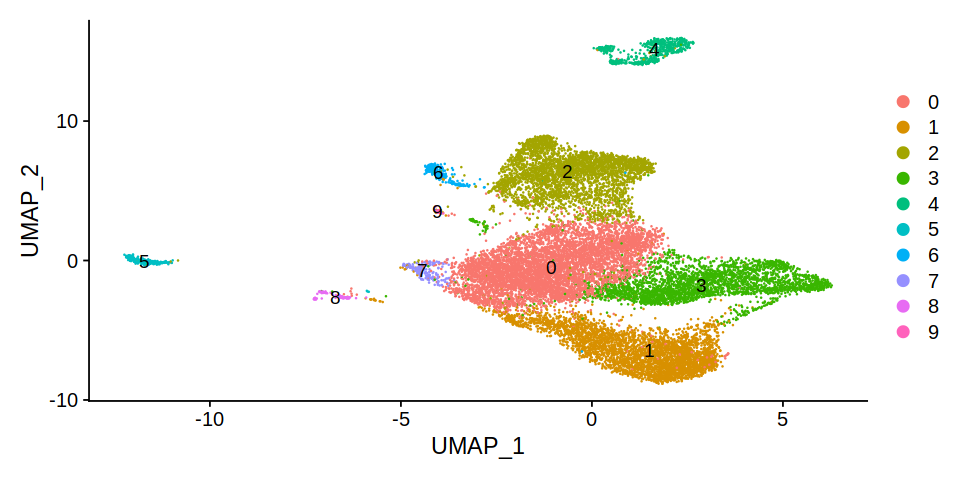

In [212]:
options(repr.plot.width = 8, repr.plot.height = 4)
DimPlot(subobj, label = TRUE)

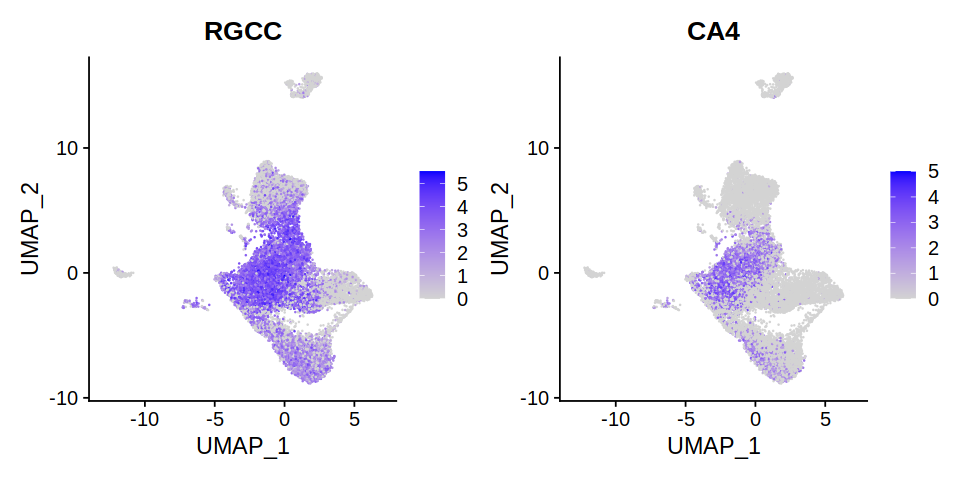

In [213]:
options(repr.plot.width = 8, repr.plot.height = 4)
FeaturePlot(subobj, c("RGCC","CA4"))

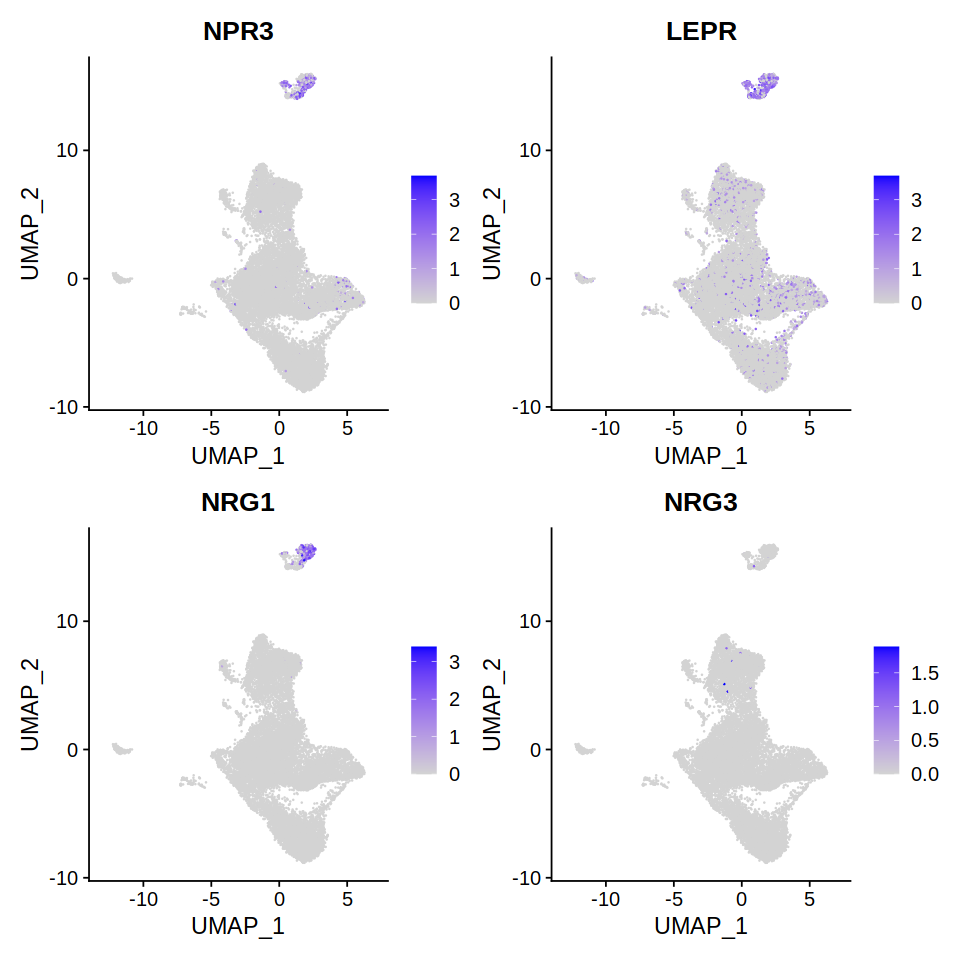

In [215]:
options(repr.plot.width = 8, repr.plot.height = 8)
FeaturePlot(subobj, c("NPR3","LEPR","NRG1","NRG3"),ncol = 2)

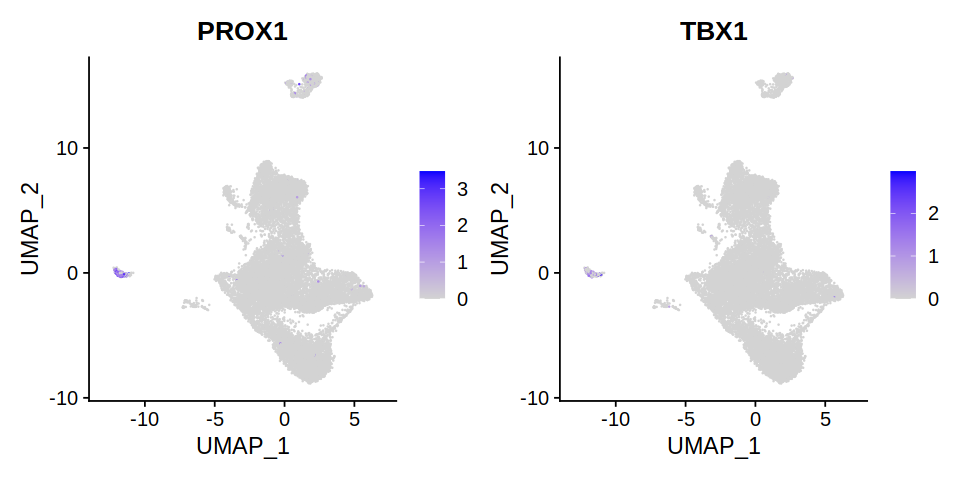

In [216]:
options(repr.plot.width = 8, repr.plot.height = 4)
FeaturePlot(subobj, c("PROX1","TBX1"),ncol = 2)

Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: NR2F231”


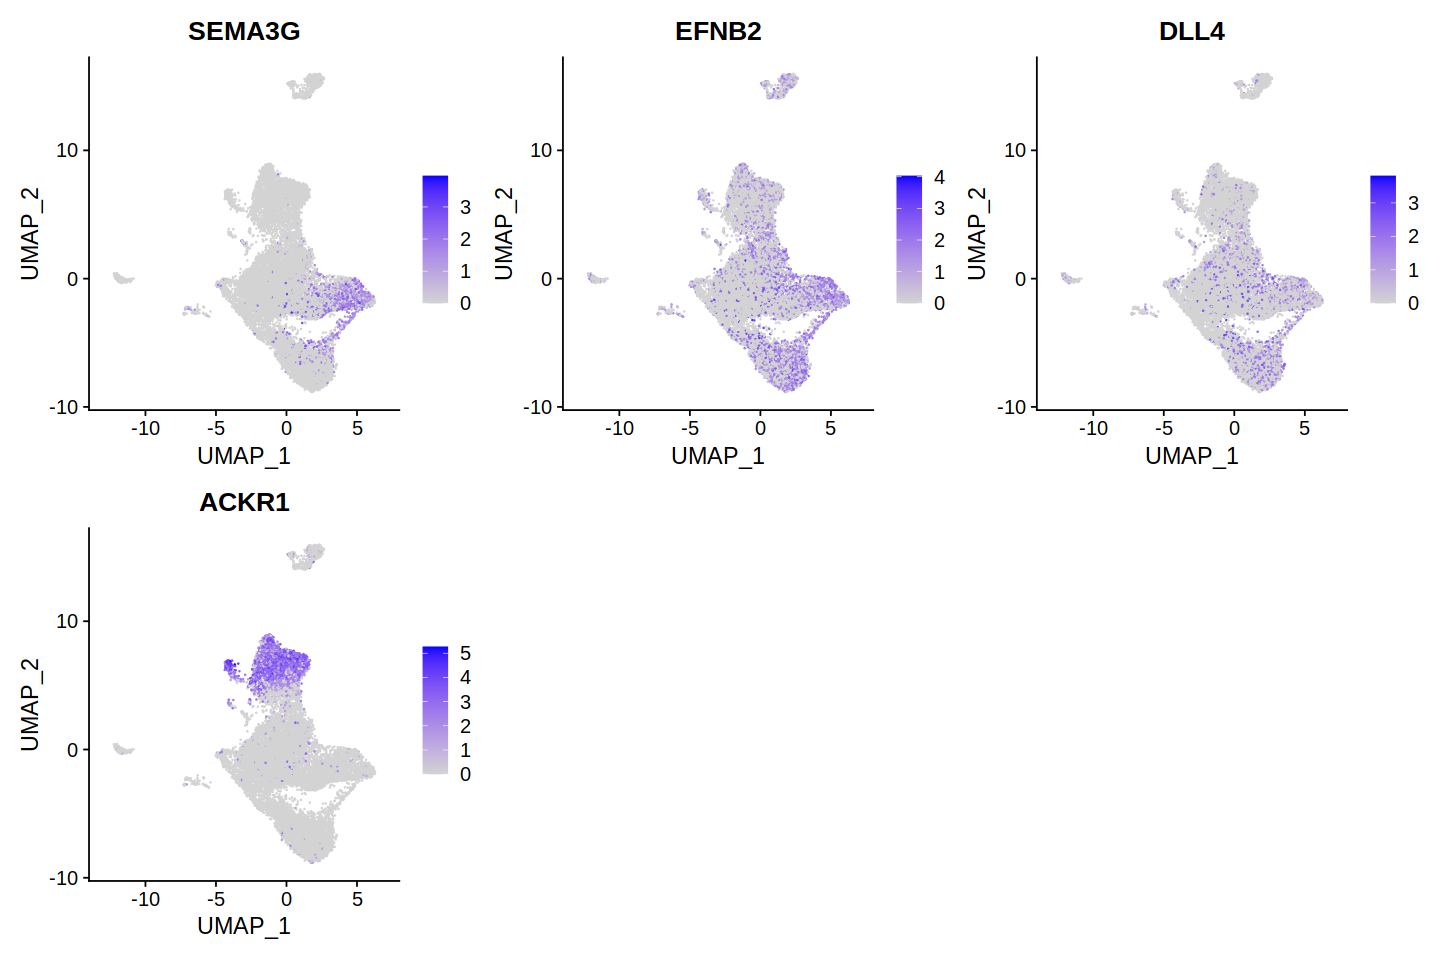

In [218]:
options(repr.plot.width = 12, repr.plot.height = 8)
FeaturePlot(subobj, c("SEMA3G","EFNB2","DLL4","NR2F231","ACKR1"),ncol = 3)

In [224]:
subobj <- RenameIdents(subobj,'0'="Capillary endothelial cell",'1'="Capillary endothelial cell",'7'="Capillary endothelial cell",'8'="Capillary endothelial cell",'9'="Capillary endothelial cell")
subobj <- RenameIdents(subobj,'4'="Endocardial cell")
subobj <- RenameIdents(subobj,'5'="Lymphatic endothelial cell")
subobj <- RenameIdents(subobj,'2'="Vascular endothelial cell",'3'="Vascular endothelial cell",'6'="Vascular endothelial cell")

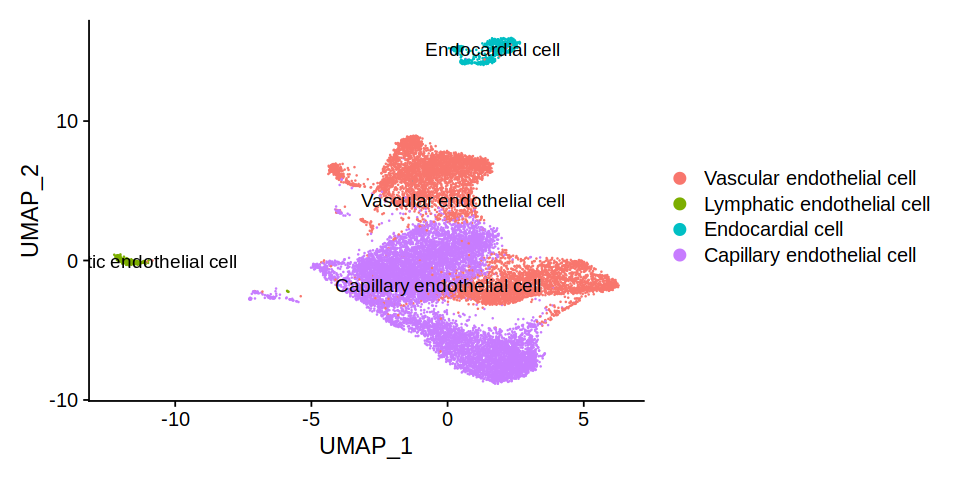

In [225]:
options(repr.plot.width = 8, repr.plot.height = 4)
DimPlot(subobj, label = TRUE)

In [241]:
subobj$Layer2 <- as.character(Idents(subobj))
obj.merged@meta.data[row.names(subobj[[]]),"Layer2"] <- subobj$Layer2

### Fibroblast subtypes

In [244]:
subobj <- subset(obj.merged,Layer1=="Fibroblast")

In [245]:
subobj

An object of class Seurat 
58233 features across 8978 samples within 1 assay 
Active assay: RNA (58233 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

In [246]:
subobj <- quick_process(subobj)
subobj <- FindClusters(subobj,resolution = 0.25)

Centering and scaling data matrix

PC_ 1 
Positive:  TSC22D3, ASPN, COL1A1, COL3A1, SPARC, SFRP4, TSC22D1, COL1A2, LUM, BGN 
	   OGN, LOXL1, AGT, FRZB, AEBP1, IGFBP3, OMD, BST2, LRRC17, THBS4 
	   CRIP1, COL14A1, TPM1, POSTN, PRSS23, FGL2, MMP23B, SMOC2, TXNIP, ELN 
Negative:  C11orf96, MGST1, FGF7, SOD2, SPTSSA, NR4A1, PLA2G2A, RARRES1, CFD, NEAT1 
	   BHLHE40, THBS1, TMEM176A, DDX21, IER3, NAMPT, HSP90AA1, CYR61, UAP1, GFPT2 
	   LDLR, DNAJB1, GPRC5A, TNFAIP6, C3, CHRDL2, MEDAG, GPX3, MIDN, TMEM176B 
PC_ 2 
Positive:  FOS, BGN, DUSP1, JUNB, SPARC, ELN, GADD45B, COL1A2, ZFP36, TAGLN 
	   COL1A1, PRSS23, COL3A1, JUN, ID4, MYL6, ID3, LMCD1, EFEMP1, ID1 
	   ACTB, FOSB, PPIC, HLA-C, GEM, IGFBP7, PDLIM3, AEBP1, ACTA2, PPP1R15A 
Negative:  APOD, MYL2, CFD, DLK1, TNNI3, TNNT2, TNNC1, ACTA1, C3, TLL2 
	   COX6A2, ACSM3, ACTC1, MYL3, FMO2, VEGFD, TCAP, SHISA3, S100A1, PLN 
	   PTGDS, CKM, MB, RXRG, DES, ANKRD1, NPPC, FABP3, NRXN1, C7 
PC_ 3 
Positive:  FMO2, APOE, C7, CCL2, CXCL12, A2M, PTGIR

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8978
Number of edges: 328234

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9099
Number of communities: 10
Elapsed time: 0 seconds


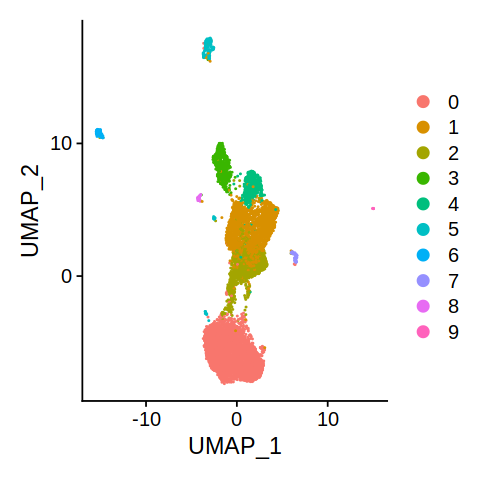

In [249]:
DimPlot(subobj)

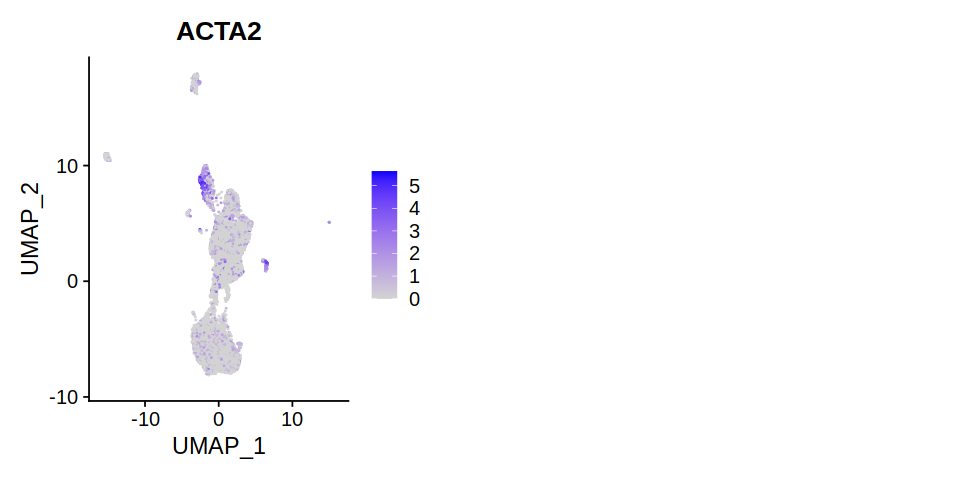

In [251]:
options(repr.plot.width = 8, repr.plot.height = 4)
FeaturePlot(subobj, c("ACTA2"),ncol = 3)

Warning message in FeaturePlot(subobj, c("CCR2", "CXCR4"), ncol = 3):
“All cells have the same value (0) of CCR2.”


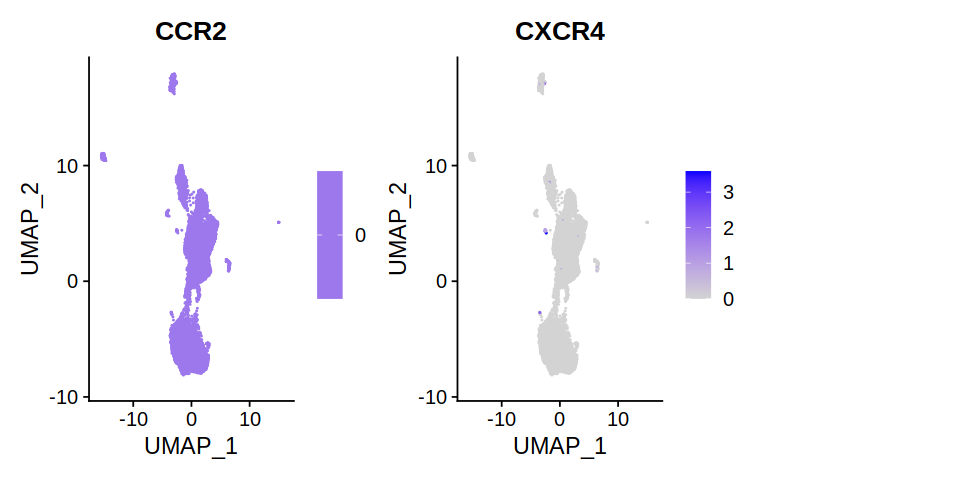

In [252]:
options(repr.plot.width = 8, repr.plot.height = 4)
FeaturePlot(subobj, c("CCR2","CXCR4"),ncol = 3)

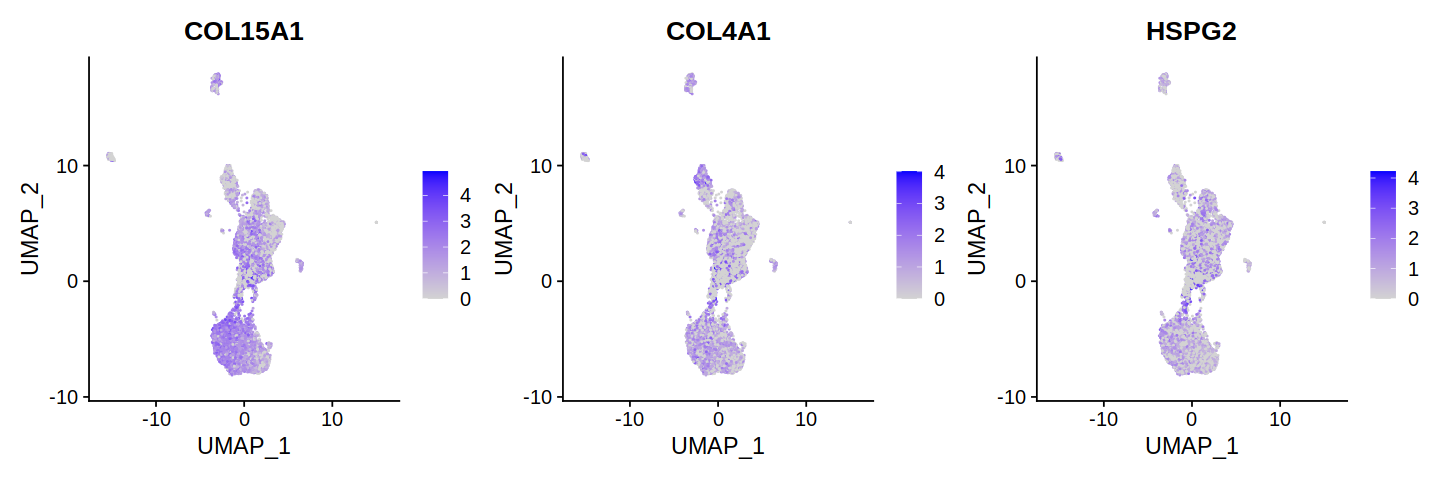

In [253]:
options(repr.plot.width = 12, repr.plot.height = 4)
FeaturePlot(subobj, c("COL15A1","COL4A1","HSPG2"),ncol = 3)

In [257]:
subobj$Layer2 <- "Basement membrane fibroblast"
subobj$Layer2[Idents(subobj)=="3"] <- "Myofibroblast"

In [258]:
obj.merged@meta.data[row.names(subobj[[]]),"Layer2"] <- subobj$Layer2

### Myeloid subtypes

In [489]:
subobj <- subset(obj.merged,Layer1=="Myeloid cell")

In [490]:
subobj

An object of class Seurat 
58233 features across 27654 samples within 1 assay 
Active assay: RNA (58233 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

In [491]:
subobj <- quick_process(subobj)
subobj <- FindClusters(subobj,resolution = 0.25)

Centering and scaling data matrix

PC_ 1 
Positive:  TYMS, CD3E, MKI67, RRM2, IL32, GZMA, PTPRCAP, LCK, CCL5, CD3G 
	   CD3D, CD8A, CD2, C12orf75, CENPM, NUSAP1, CD6, GZMH, IFITM1, TPX2 
	   TOP2A, NKG7, SAMD3, UBE2C, SKAP1, SYNE2, PRF1, ASPM, ZAP70, BIRC5 
Negative:  FTL, C1QA, SELENOP, C1QC, RNASE1, C1QB, CTSB, CD14, LYVE1, MAFB 
	   HLA-DRA, DAB2, FOS, F13A1, CFD, PLTP, HSPA1A, LGMN, IER3, ZFP36L1 
	   S100A9, CEBPD, CD74, LYZ, EMP1, JUN, CTSL, CXCL2, MARCO, TIMP1 
PC_ 2 
Positive:  IL1B, NFKBIA, NLRP3, BCL2A1, TNFAIP3, DUSP2, GPR183, BIRC3, CXCL8, PLAUR 
	   BTG1, CXCR4, JUNB, CD83, CCL3L3, KDM6B, ZFAND5, SRGN, CCL4L2, DUSP1 
	   CCL3, CXCL2, AREG, ZFP36, NFKBIZ, NR4A2, STX11, RILPL2, CCL4, NR4A3 
Negative:  RNASE1, LYVE1, SELENOP, F13A1, PLTP, C1QA, DAB2, C1QB, C1QC, LGMN 
	   CD14, PMP22, EMP1, S100A9, MARCO, CCL2, CD59, CTSL, CRIP1, CCL18 
	   CCL13, ZFP36L1, CD209, RETN, MT-RNR1, S100A10, HIST1H4C, S100A8, LMNA, TTN 
PC_ 3 
Positive:  IER3, LMNA, CTSB, ZFP36L1, ATF3, F13A1, EGR

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 27654
Number of edges: 991224

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9251
Number of communities: 11
Elapsed time: 5 seconds


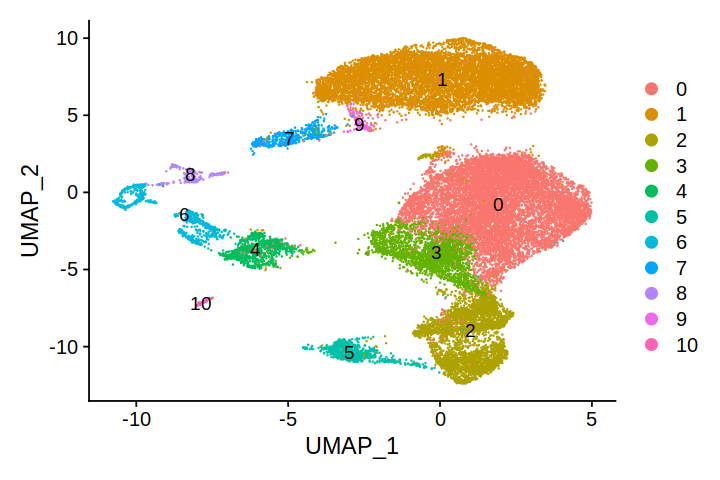

In [492]:
options(repr.plot.width = 6, repr.plot.height = 4)
DimPlot(subobj,label = TRUE)

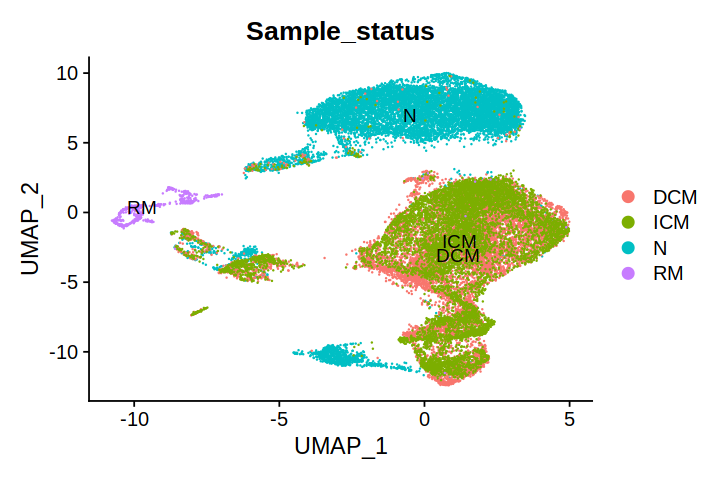

In [443]:
options(repr.plot.width = 6, repr.plot.height = 4)
DimPlot(subobj,label = TRUE,group.by = "Sample_status")

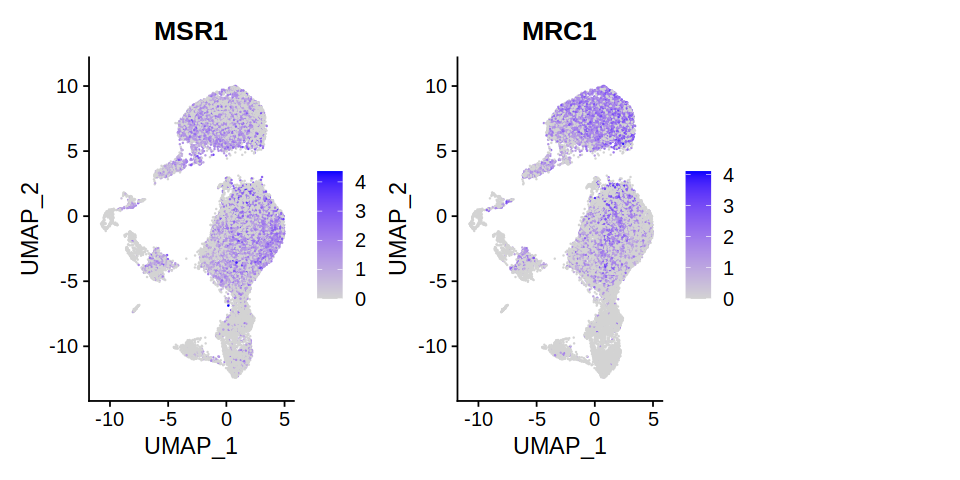

In [438]:
options(repr.plot.width = 8, repr.plot.height = 4)
FeaturePlot(subobj, c("MSR1","MRC1"),ncol = 3)

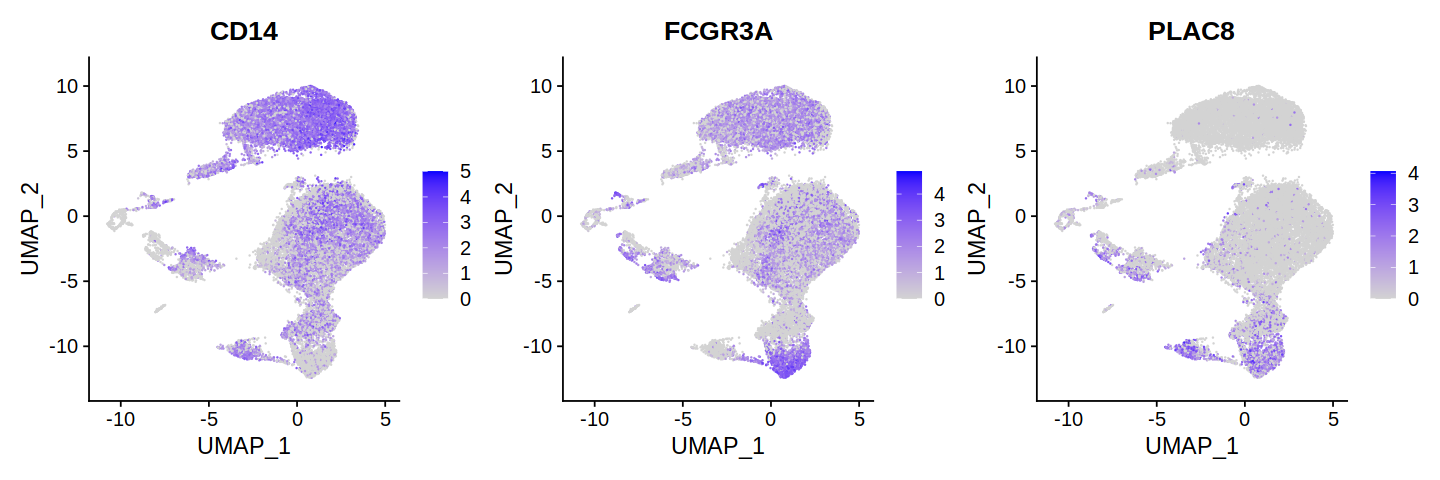

In [439]:
options(repr.plot.width = 12, repr.plot.height = 4)
FeaturePlot(subobj, c("CD14","FCGR3A","PLAC8"),ncol = 3)

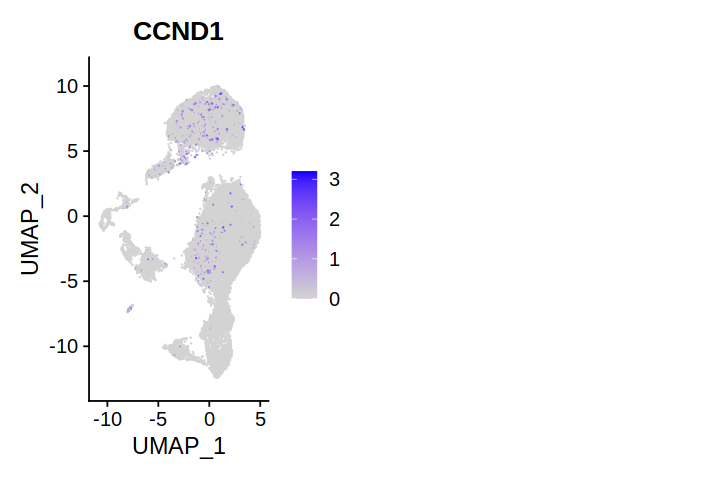

In [440]:
options(repr.plot.width = 6, repr.plot.height = 4)
FeaturePlot(subobj, c("CCND1"),ncol = 3)

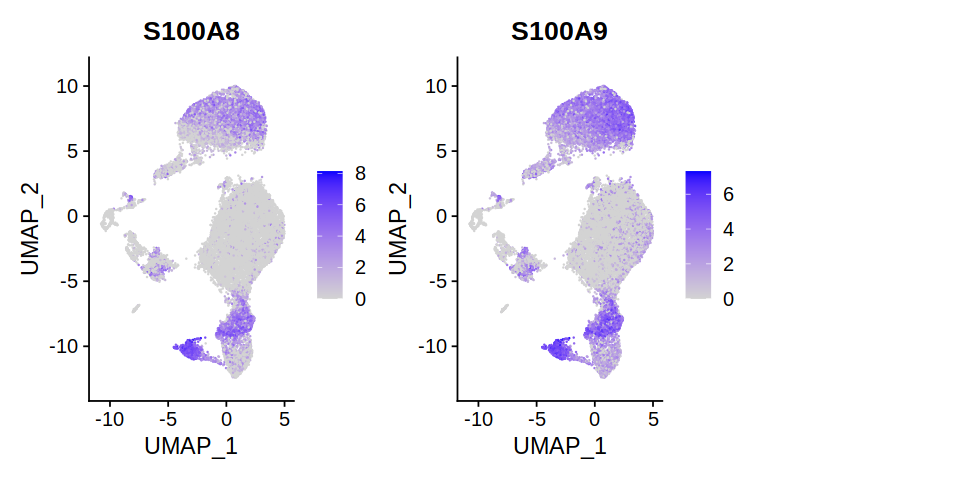

In [441]:
options(repr.plot.width = 8, repr.plot.height = 4)
FeaturePlot(subobj, c("S100A8","S100A9"),ncol = 3)

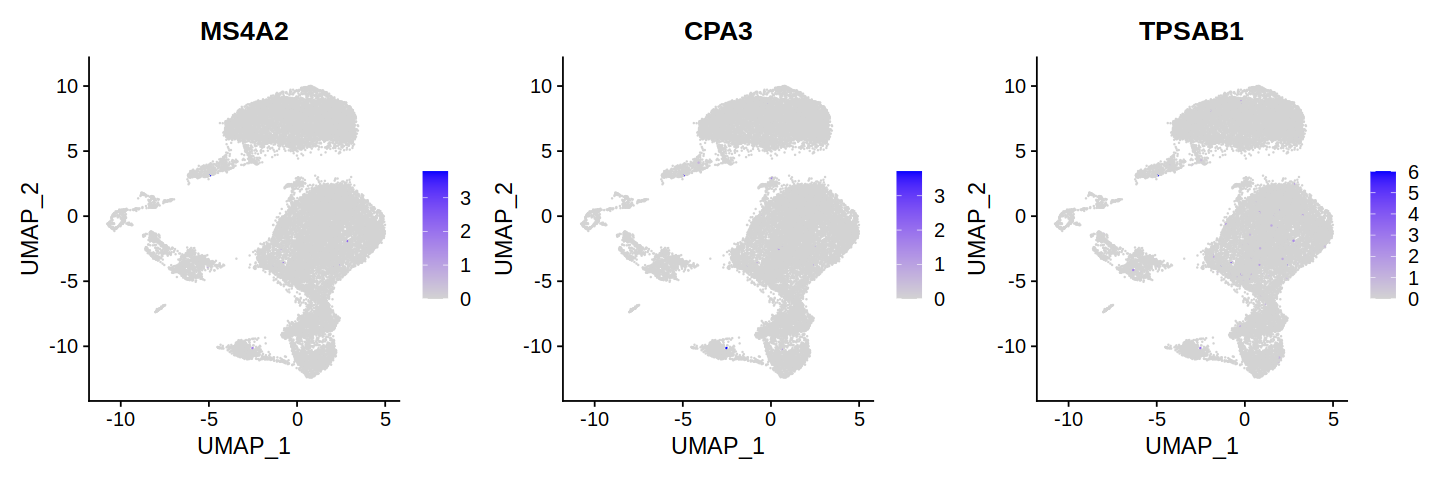

In [442]:
options(repr.plot.width = 12, repr.plot.height = 4)
FeaturePlot(subobj, c("MS4A2","CPA3","TPSAB1"),ncol = 3)

In [497]:
subobj <- RenameIdents(subobj,'0'="Macorphage",'1'="Macorphage",'7'="Macorphage",'3'="Macorphage",'9'="Macorphage")
subobj <- RenameIdents(subobj,'2'="Monocyte",'6'="Monocyte",'4'="Monocyte",'10'="Monocyte",'5'="Monocyte")
subobj <- RenameIdents(subobj,'8'="Myeloid cell")

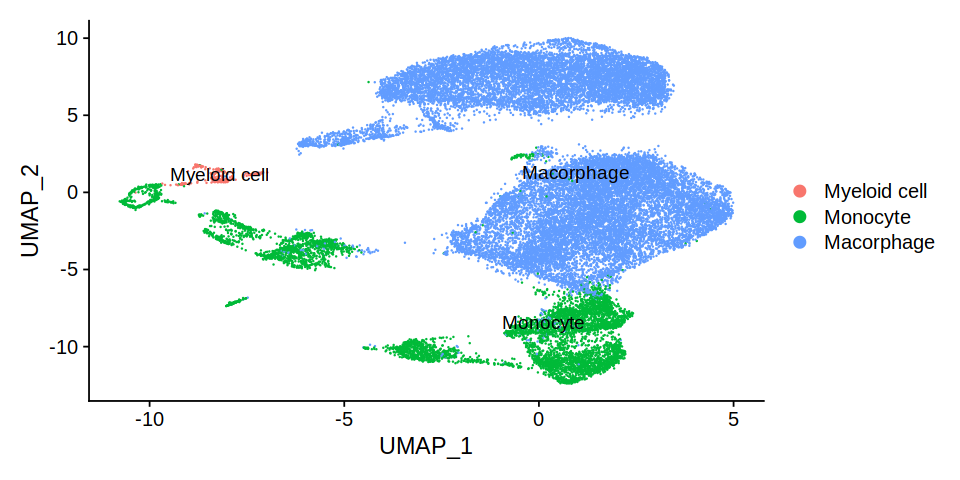

In [498]:
options(repr.plot.width = 8, repr.plot.height = 4)
DimPlot(subobj, label = TRUE)

In [499]:
subobj$Layer2 <- as.character(Idents(subobj))
obj.merged@meta.data[row.names(subobj[[]]),"Layer2"] <- subobj$Layer2

### Lymphoid subtypes

In [453]:
subobj <- subset(obj.merged,Layer1=="Lymphoid cell" & Sample %in% c('GSM4307515_N-1-LVP','GSM4307516_N-1-LVN','GSM4307517_N-1-RVP','GSM4307518_N-1-RVN','GSM4307520_DCM-2-LVP','GSM4307521_DCM-2-LVN','GSM4307522_DCM-2-RVP','GSM4307523_DCM-2-RVN','GSM4307525_DCM-3-LVP','GSM4307526_DCM-3-LVN','GSM4307527_DCM-3-RVP','GSM4307530_ICM-1-MIP','GSM4307532_ICM-1-NMIP','GSM4307535_ICM-2-LVP','GSM4307537_ICM-2-RVP','GSM4307540_ICM-3-LVP','GSM4307542_ICM-3-RVP'))

In [454]:
subobj

An object of class Seurat 
58233 features across 41638 samples within 1 assay 
Active assay: RNA (58233 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

In [455]:
subobj <- quick_process(subobj)
subobj <- FindClusters(subobj,resolution = 0.2)

Centering and scaling data matrix

PC_ 1 
Positive:  NKG7, GZMB, KLRD1, PRF1, GNLY, FCGR3A, FGFBP2, GZMH, KLRF1, CTSW 
	   TYROBP, SPON2, TRDC, PLEK, CD247, CLIC3, S1PR5, GZMA, ADGRG1, ZEB2 
	   CCL4, MYOM2, HOPX, FCER1G, HAVCR2, CX3CR1, PLAC8, TTC38, CCL3, ID2 
Negative:  LTB, CD79A, GPR183, IGHM, RPL13, CXCR4, MS4A1, BANK1, RPS18, RPL13A 
	   JUNB, CCR7, IL7R, RPL39, RPS8, RPL32, LINC00926, IGHD, TNFRSF13C, RPS12 
	   EEF1A1, RPL11, RPL34, RPS23, RPS6, BIRC3, RPLP1, RPL10, RPL9, RPS2 
PC_ 2 
Positive:  CD79A, IGHM, BANK1, IGHD, LINC00926, MEF2C, MS4A1, TNFRSF13C, MARCH1, TCL1A 
	   VPREB3, IRF8, FCER2, BCL11A, CD22, RP11-693J15.5, FAM129C, RALGPS2, CD79B, GNG7 
	   TCF4, FCRLA, SWAP70, PLAC8, FCGR3A, ADAM28, CD24, HVCN1, GZMB, NAPSB 
Negative:  TRAC, IL7R, GZMK, IL32, RGS1, RGCC, CXCR4, CD69, ZFP36L2, JUNB 
	   CXCR6, FOSB, FOS, CITED2, CD3G, AIM1, ANXA1, DUSP4, TRAT1, TNFAIP3 
	   SAMSN1, JUN, CD40LG, TSC22D3, ITM2A, VIM, KLF6, RP11-138A9.1, LMNA, RCAN3 
PC_ 3 
Positive:  RPL10, EEF

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 41638
Number of edges: 1425782

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9295
Number of communities: 11
Elapsed time: 6 seconds


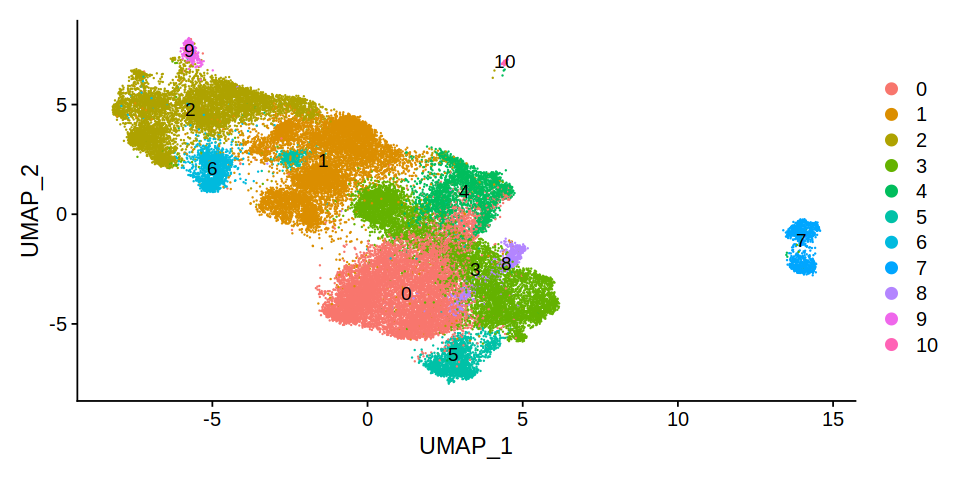

In [456]:
DimPlot(subobj,label = TRUE)

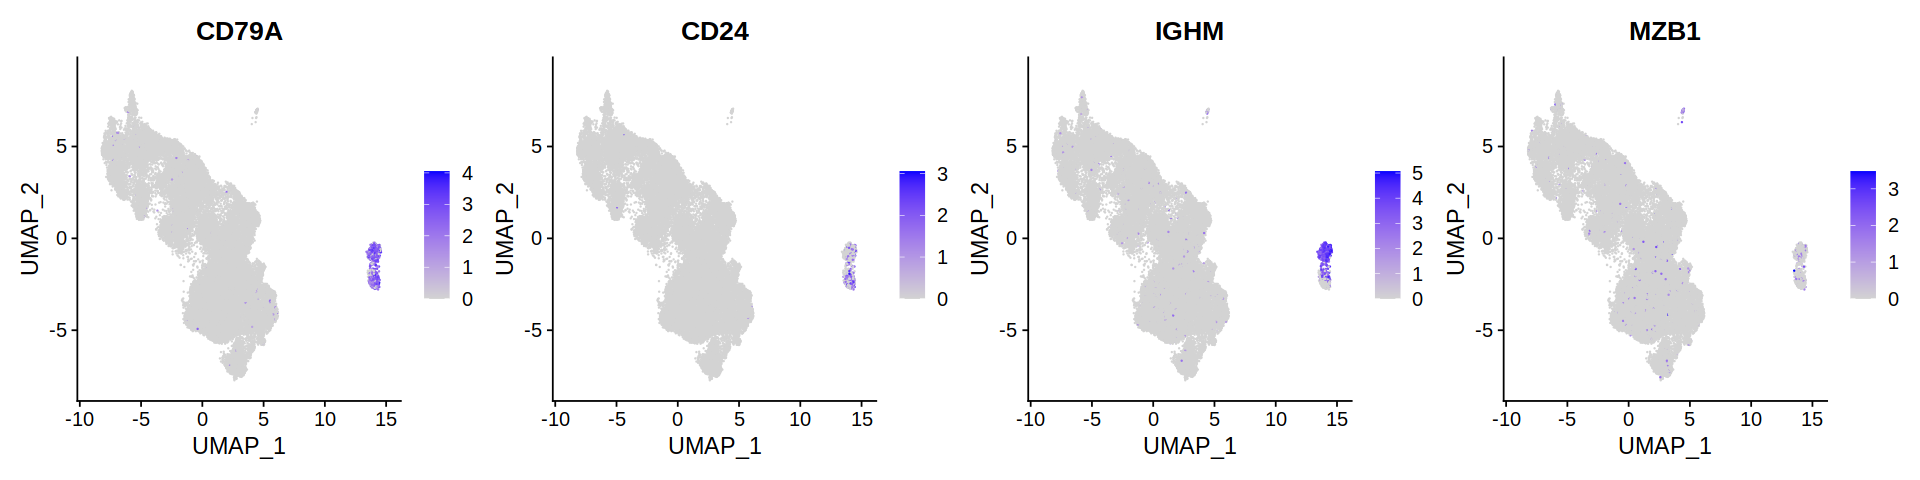

In [457]:
options(repr.plot.width = 16, repr.plot.height = 4)
FeaturePlot(subobj, c("CD79A","CD24","IGHM","MZB1"),ncol = 4)

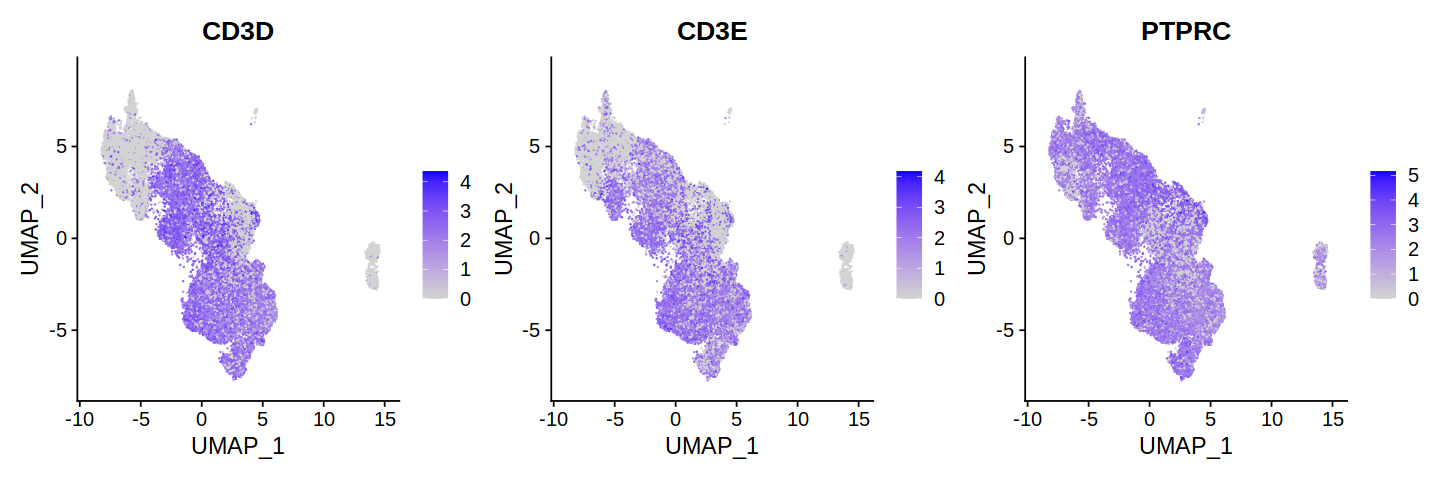

In [458]:
options(repr.plot.width = 12, repr.plot.height = 4)
FeaturePlot(subobj, c("CD3D","CD3E","PTPRC"),ncol = 3)

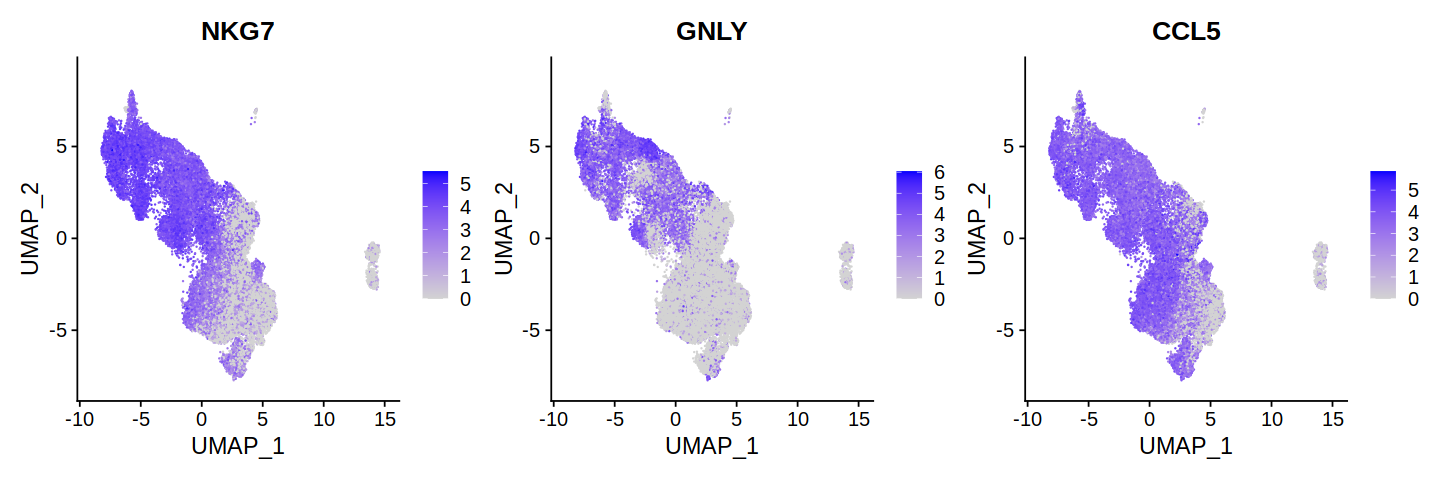

In [459]:
options(repr.plot.width = 12, repr.plot.height = 4)
FeaturePlot(subobj, c("NKG7","GNLY","CCL5"),ncol = 3)

In [465]:

subobj <- RenameIdents(subobj,'0'="T cell",'3'="T cell",'4'="T cell",'5'='T cell','8'='T cell')
subobj <- RenameIdents(subobj,'2'="NK cell",'1'="NK cell",'6'= "NK cell",'9'= "NK cell")
subobj <- RenameIdents(subobj,'7'="B cell")
subobj <- RenameIdents(subobj,'10'="Lymphoid cell")

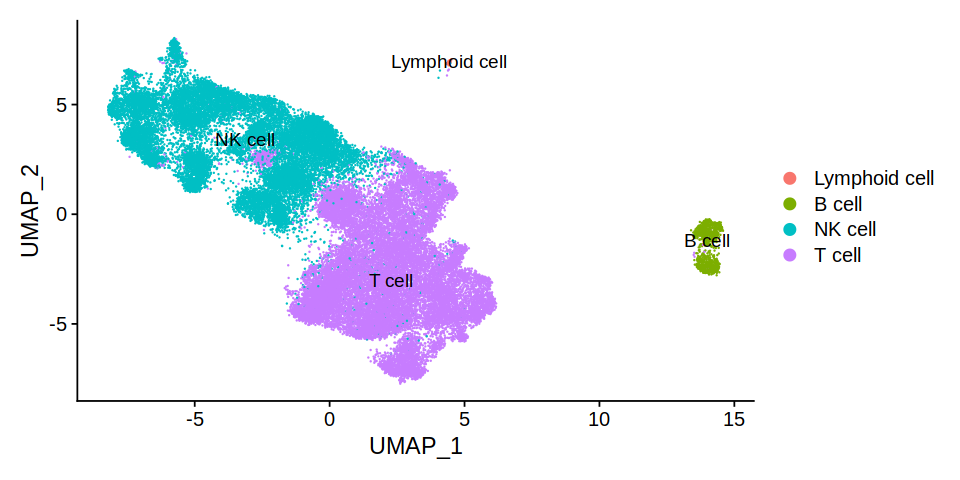

In [466]:
options(repr.plot.width = 8, repr.plot.height = 4)
DimPlot(subobj, label = TRUE)

In [467]:
subobj$Layer2 <- as.character(Idents(subobj))
obj.merged@meta.data[row.names(subobj[[]]),"Layer2"] <- subobj$Layer2

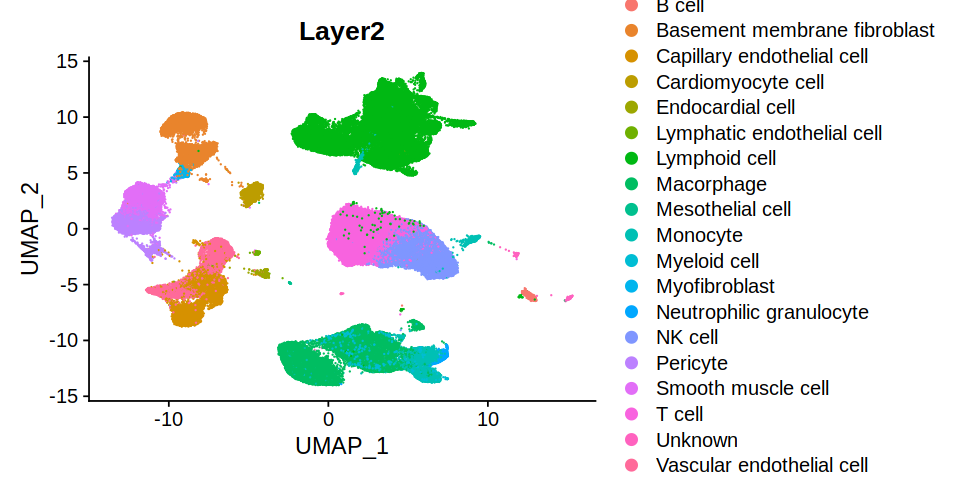

In [468]:
DimPlot(obj.merged, group.by = "Layer2",raster=FALSE)

## Layer3

In [500]:
obj.merged$Layer3 <- obj.merged$Layer2

### T cell subset

In [501]:
subobj <- subset(obj.merged,Layer2=="T cell")

In [502]:
subobj

An object of class Seurat 
58233 features across 22573 samples within 1 assay 
Active assay: RNA (58233 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

In [503]:
subobj <- quick_process(subobj)
subobj <- FindClusters(subobj,resolution = 0.2)

Centering and scaling data matrix

PC_ 1 
Positive:  RPL13, RPS18, RPL10, RPL21, EEF1A1, RPS12, RPS6, RPL13A, RPL32, RPL18A 
	   RPL3, RPL34, RPL11, RPL39, RPLP1, RPS2, RPL7, RPS4X, RPL19, RPS8 
	   RPS23, RPS3A, RPS13, RPL9, RPL10A, RPS5, TPT1, RPSA, RPL5, RPL37 
Negative:  MT-RNR2, CCL4, MT-RNR1, CCL5, JUN, NEAT1, CCL4L2, DTHD1, KLRD1, FOSB 
	   CTD-3252C9.4, ZEB2, ID2, GZMH, IFNG, RPS26P43, TNF, HEXIM1, HSPA1B, EGR1 
	   CCL3, HSPA1A, HIST1H3D, INTS6, ANKRD28, EOMES, ZSWIM4, GZMA, XCL2, RPL31P47 
PC_ 2 
Positive:  ZFP36L2, RGS1, ZFP36, DUSP2, CXCR4, SRGN, CCL4, MCL1, JUNB, SAMSN1 
	   ZNF331, CREM, NR4A2, RGCC, CD69, GZMK, ATP1B3, DUSP4, RP11-463O12.5, TNFAIP3 
	   TSC22D3, CXCR6, TMEM2, FAM46C, RUNX3, MYADM, BTG2, FAM177A1, GZMA, EZR 
Negative:  RPL10P9, SELL, GNLY, FGFBP2, RPL34, KLF2, HSPA1B, CCR7, PLAC8, MAL 
	   RPL22, LEF1, KLRD1, MTND2P28, RPL32, TXK, GIMAP7, RP11-371A22.1, FAM65B, FCGR3A 
	   7SK.4, KLRF1, TRABD2A, RPS6, TSHZ2, MYOM2, NOSIP, RPL37, ACTN1, HSPA6 
PC_ 3 
Posit

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22573
Number of edges: 831626

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9077
Number of communities: 7
Elapsed time: 2 seconds


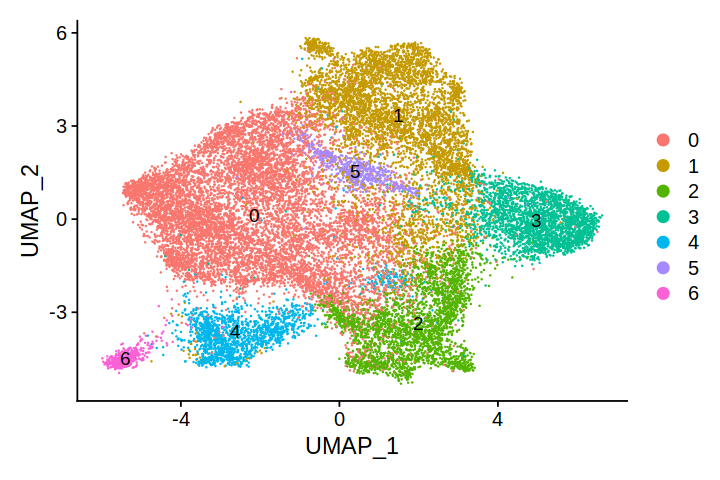

In [504]:
options(repr.plot.width = 6, repr.plot.height = 4)
DimPlot(subobj,label = TRUE)

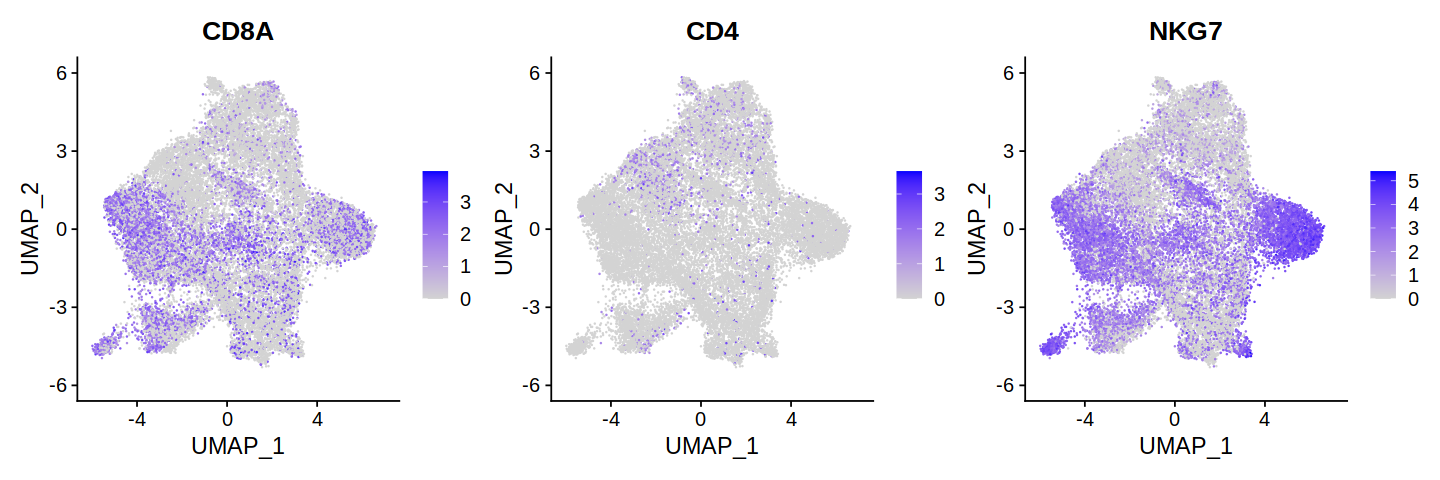

In [505]:
options(repr.plot.width = 12, repr.plot.height = 4)
FeaturePlot(subobj, c("CD8A","CD4","NKG7"),ncol = 3)

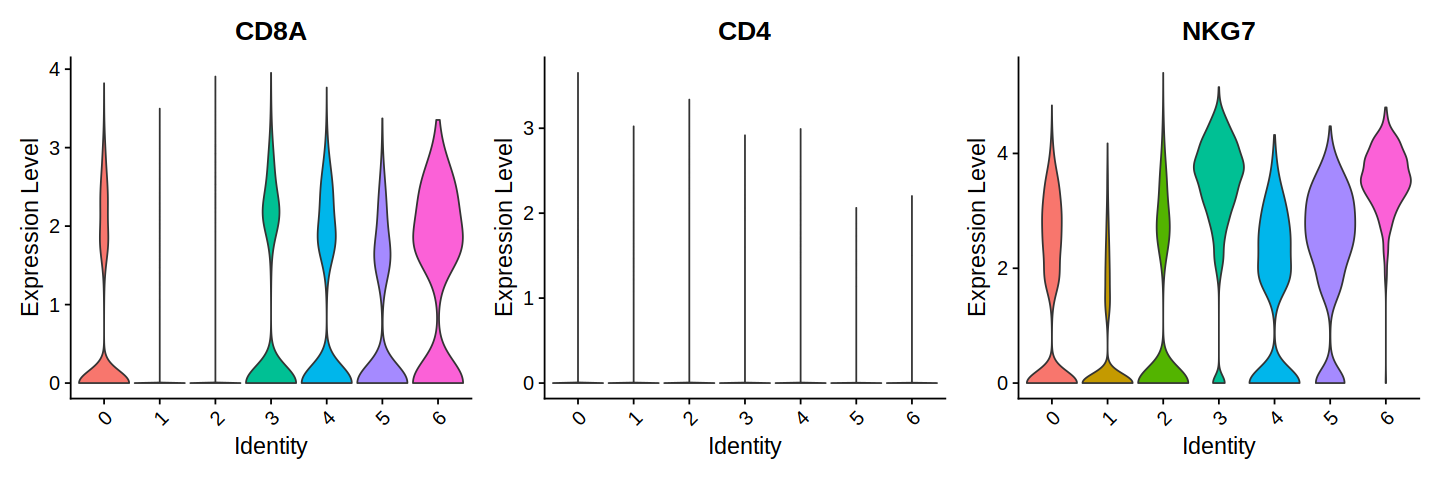

In [506]:
VlnPlot(subobj, c("CD8A","CD4","NKG7"),ncol = 3,pt.size = 0)

In [507]:
subobj <- RenameIdents(subobj,'3'="NK T cell",'6'="NK T cell")
subobj <- RenameIdents(subobj,'0'="CD8 T cell",'4'="CD8 T cell",'5'="CD8 T cell")
subobj <- RenameIdents(subobj,'1'="T cell", '2'="T cell")

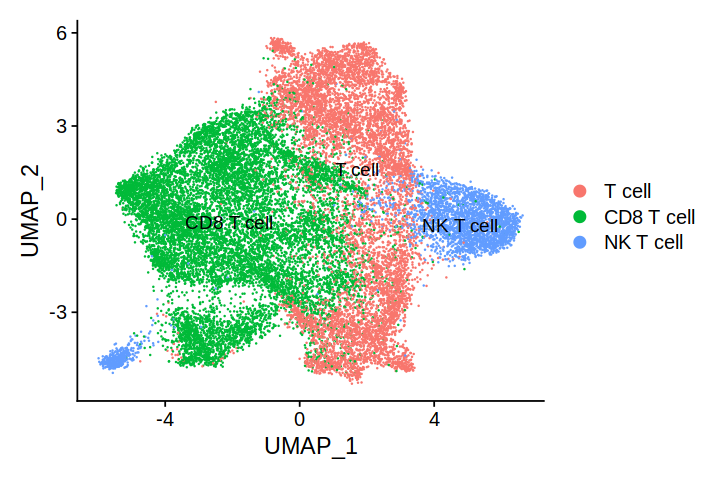

In [508]:
options(repr.plot.width = 6, repr.plot.height = 4)
DimPlot(subobj,label = TRUE)

In [509]:
subobj$Layer3 <- as.character(Idents(subobj))
obj.merged@meta.data[row.names(subobj[[]]),"Layer3"] <- subobj$Layer3

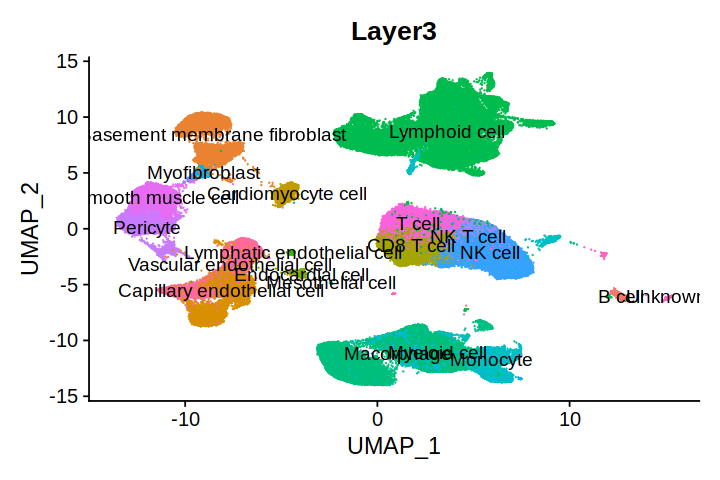

In [510]:
DimPlot(obj.merged,group.by = "Layer3",raster=FALSE,label=TRUE)+ NoLegend()

In [518]:
saveRDS(obj.merged,"/data1/chenyx/NewAnnotation/Heart_Rao_2021.rds")

In [511]:
obj.health <- subset(obj.merged,Sample_status=="N")

In [512]:
obj.health <- quick_process(obj.health)

Centering and scaling data matrix

PC_ 1 
Positive:  DCN, MGP, SPARCL1, APOD, C1R, IGFBP7, PLAC9, C1S, GSN, SERPING1 
	   LUM, COL6A2, SERPINF1, C7, FBLN1, TIMP3, COL6A1, CCDC80, PTN, NNMT 
	   SOD3, PCOLCE, MGST1, EFEMP1, MMP2, C11orf96, CYR61, COL1A2, CALD1, SELENOM 
Negative:  SRGN, TYROBP, FCER1G, AIF1, CD74, S100A9, C1QA, HLA-DRA, MS4A6A, C1QB 
	   C1QC, CD14, CTSB, RNASE1, F13A1, LYZ, HLA-DRB1, MS4A7, LYVE1, CTSS 
	   ITGB2, LST1, ALOX5AP, COTL1, HLA-DQA1, HCST, HLA-DPA1, HLA-DPB1, MS4A4A, S100A8 
PC_ 2 
Positive:  CAV1, ID1, SLC9A3R2, ESAM, FLT1, ID3, TM4SF1, VWF, ADGRF5, A2M 
	   EMCN, PPP1R14A, TINAGL1, CAV2, IFI27, H19, C8orf4, GNG11, ADGRL4, MGLL 
	   FABP5, SOX18, RAMP2, AQP1, PCAT19, ITGA1, CRIP2, ANXA3, ADAMTS9, FABP4 
Negative:  TIMP1, VCAN, FTH1, FTL, CFD, SERPINF1, SOD2, MGST1, LUM, TYROBP 
	   MMP2, THBS1, AIF1, FCER1G, C7, EFEMP1, C1S, MEG3, CCDC80, SH3BGRL3 
	   C3, FBLN1, CDH19, ABCA8, SRPX, TNFAIP6, FGF7, TMEM176B, PLTP, C1QA 
PC_ 3 
Positive:  FTL, RNASE1, HLA-DR

In [513]:
obj.health <- obj.health[,! obj.health$Layer1=="Unknown"]

In [514]:
obj.health$Layer2[obj.health$Layer3=="Macorphage"] <- "Macrophage"
obj.health$Layer3[obj.health$Layer3=="Macorphage"] <- "Macrophage"

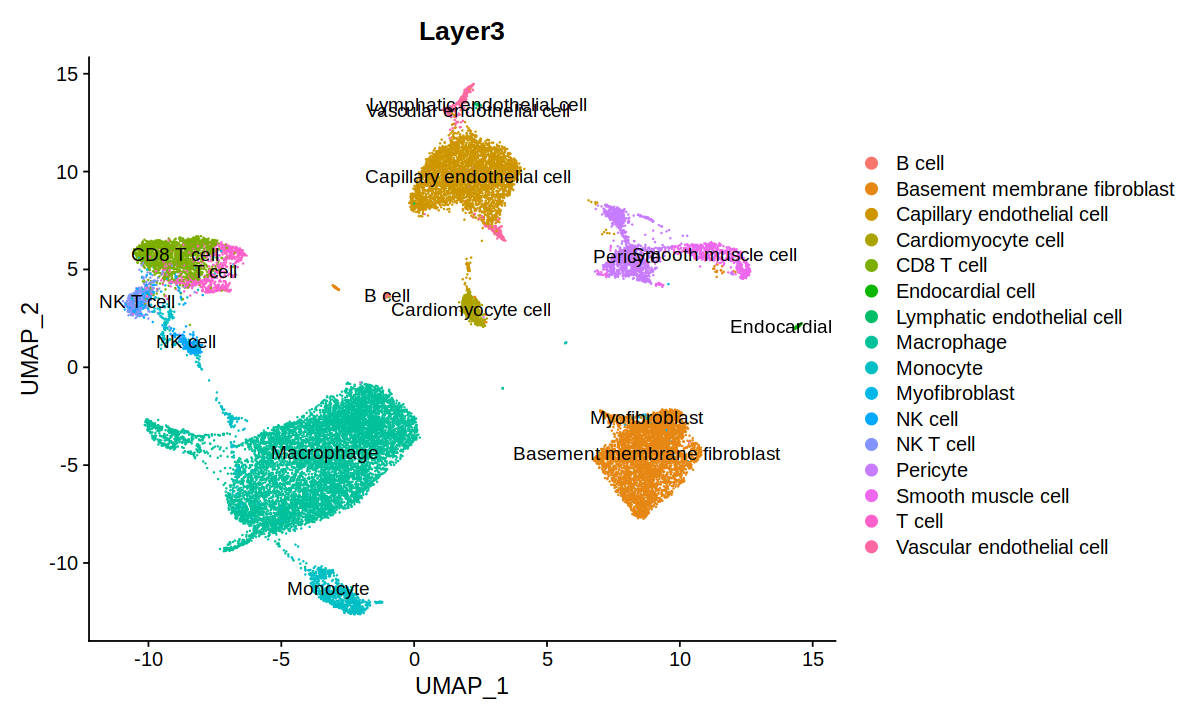

In [515]:
options(repr.plot.width = 10, repr.plot.height = 6)
DimPlot(obj.health,group.by = "Layer3",label = TRUE)

In [517]:
saveRDS(obj.health,"/data1/chenyx/NewAnnotation/Heart_Rao_2021.Healthy.rds")

In [516]:
write.csv(obj.health[[]],"/data1/chenyx/NewAnnotation/Healthy.Metadata.csv")

In [402]:
query_data <- as.data.frame(as.matrix(obj.health@assays$RNA@counts))

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 10.7 GiB”


In [405]:
write.csv(query_data,"/data1/chenyx/NewAnnotation/Healthy.expression.csv")